# Introduction: Business Problem


When a customer orders a product which is not available in the store or out-of-stock temporarily or due to lack of supply, the customer decides to wait until the desired product is available and there is a guaranteed delivery, then this scenario is called Backorder of the specific product. If the backorders are not handled promptly , there is a high chance of losing a customer to its competitor , along with impact on revenue,share market price etc. On the other hand, taking actions to satisfy or reduce backorders puts tremendous amounts of pressure on the different stages of supply chain management.Taking steps to satisfy or reduce backorders will lead to increased labor/production/transport/Warehouse costs etc.Machine Learning can identify patterns related to backorders before the customer orders. With this, the production can adjust to minimise delays for customer service and provide accurate dates to keep the customers informed. This predictive analysis approach gives the company ample time to react and enables them to satisfy the demands of customers and smooth the supply chain process.The case study “Backorder Prediction” deals with predicting the backorders of products by applying Machine Learning techniques to overcome or reduce the cost of backorders. We will identify parts with the highest chances of shortage so that we could present a high opportunity to improve the company's overall performance.This case study deals with investigating Machine Learning classifiers
for imbalanced dataset where the chance of an item going into backorder is very rare when compared to items that do not.

## Why Machine Learning is needed?

Through Machine Learning classification techniques, supply chain parameters could be analysed for different product lines.This allows Manufacturer/Company to predict and identify the products that would be unavailable in near future and then take the right step to neutralise the shortage.The predictions based on the ML Models improve with time as they get more data to work on.The degree of performance metrics of these predictive models can be improved by using ensembling techniques which uses diverse models combines them to produce improved results.

## Problem Statement
Classify the product whether they would go into backorder(Yes or No) based on data like forecast sales,sales quantity ,threshold values,past performance etc.

## ML Formulation
The task at hand is classifying whether a product will go to backorder or not for a given input data.This is a Binary Classification Problem hence consists of two target
values :
- Yes: Represents that product will go to backorder.
- No: Represents that product will not go to backorder

## Business Constraints
- No strict latency constraints.
- Misclassification may result in less effective supply chain management systems such as inaccurate demand forecasting
  and misclassification of backorder products.

## Dataset Analysis 
Dataset consists of 23 columns namely :
SKU : stands for Stock Keeping Unit. It is a unique ID for each row

National_inv : Present Inventory level of the product

Lead time : Transit time of the product which means how long it takes for a shipment to be delivered at its final destination after it has been picked from the start point.

In_transit_qty : it is calculated based on the last picking slip or based on cumulative quantity.In simple words it is the amoun t of product in transit.

Forecast_3_months,Forecast_6_months,Forecast_9_months : Forecast of sales of the product for next 3,6,9 months respectively.

Sales_1_month,Sales_3_month,Sales_6_month : Sales of product in last 1,3,6,9 months respectively.

Min_bank : Minimum amount of stock recommended.

potential_issue : Problem/issue identified in the product/part

Pieces_past_due : Amount of parts of the product overdue if any.

Perf_6_months_avg,perf_12_months_avg:Product performance over past 6 months and 12 months respectively.

local_bo_qty : Amount of stock orders overdue

deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop : Yes or No flags set for the products

went_to_backorder: Target Variable

## Performance Metrics
In the case of Backorders,it happens very rarely that the products goes to backorder.So in this type of problems , Accuracy is not a useful metric since it works well with Balanced dataset.
Since the dataset is imbalanced, the ideal performance metric would be Precision,Recall and F1 score , especially not to miss failure cases.
F1 Score might be a better measure to use if we need to seek balance between Precision and Recall and also given that there is uneven class distribution(large number of Actual Negatives).

            F1_score = 2 * ((Precision*Recall)/(Precision+Recall))

Precision : This can be thought of as , Out of postively predicted values, how many are actually positive.It is calculated as 
            
            Precision = True Positive / True Postive + False Positive
            
Recall : Recall can be thought of as, out of actual positives how many were detected by our model.It is calculated as 
        
            Recall = True Positive / True Positve + False Negative

Terms used in Precision and Recall are :

- True Positive : Product detected as Backorder and it turns out to be True.Benefits by predicting correctly the Backorders as    Profit generated from such items is benefit.

- False Positive : Product detected as Backorder and it Non-Backorder product.This would cost the company as the fact that we predicted few items as Backorder items but they were not actually in Backorder list. The warehousing cost for such items is the cost associated with the false positives.

- False Negative : A miss. The product is missed to be detected by the model and product stays as Non-Backorder.This will cost the company as cost associated with incorrectly missing items when actual demand was there for them. 
            
F1 Score will be used when False Positives and False Negatives are more important as they are crucial for Bussiness cost.

Among F1 Score, we will choose Macro Averaged F1 Score since we would like to treat both class as equals. Micro F1 Score will be used when we want to maximise the classification of a particular class which is not the case in this problem. Due to imbalanced dataset, we will get high Micro Average F1 Score which is not called for.





## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from pandas import read_csv
from numpy.random import seed
from keras.layers import Input, Dense
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten
from tensorflow.keras.models import Model
import random as rn
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score

from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy import stats
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import random
import pickle
from joblib import dump,load 

In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Dataset

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Kaggle_Training_Dataset_v2.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Kaggle_Test_Dataset_v2.csv")

### Count rows and columns for train and test data

In [ ]:
print("Number of rows in train data : ",df_train.shape[0])
print("Number of rows in test data : ",df_test.shape[0])
print("Number of columns in train data : ",df_train.shape[1])
print("Number of columns in test data : ",df_test.shape[1])

Number of rows in train data :  1687861
Number of rows in test data :  242076
Number of columns in train data :  23
Number of columns in test data :  23


In [ ]:
# Removing the last rows of Train as well as Test data which contains Nan For all columns.
df_train.drop(df_train.tail(1).index,inplace=True)
df_test.drop(df_test.tail(1).index,inplace=True)

## Merge Train and Test Data

In [ ]:
df = df_train.append(df_test,ignore_index=True)

In [ ]:
df.shape

(1929935, 23)

In [ ]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


### Check for Unique rows 

In [ ]:
#Checking for unique rows
print("Number of rows in dataframe df : ",df.shape[0]," and Number of unique IDs in dataframe df : ",len(df.sku.unique()))

Number of rows in dataframe df :  1929935  and Number of unique IDs in dataframe df :  1929935


#### Comment
- Number of unique rows is same as that of unique SKU IDs.We Can use this as rowname or we may drop SKU Column

### Check for Nan Values

In [ ]:
df.isna().sum()

sku                       0
national_inv              0
lead_time            115617
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
went_on_backorder         0
dtype: int64

### Comment
- lead_time column has 115617 Nan values.Need to perform imputation because of this.

## Count of Target values of Imbalanced dataset

In [ ]:
noCount = df.went_on_backorder.value_counts()[0]
yesCount = df.went_on_backorder.value_counts()[1]
print("Went on backorder = ",yesCount)
print("Not Went on backorder = ",noCount)

Went on backorder =  13981
Not Went on backorder =  1915954


No. of products that did not go for backorder : 99.2755714570698 %
No. of products that did go for backorder : 0.7244285429302023 %


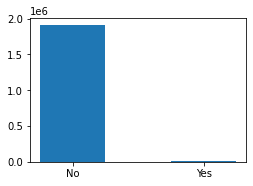

In [ ]:
fig = plt.figure() # creates a new figure
axes = fig.add_axes([0,0,0.5,0.5]) #used to add axes to the matplotlib figure
target_values = ['No','Yes'] # storing the target variables in list 
count_data = [noCount,yesCount] # storing the backordered and not backordered count in count_data list
print("No. of products that did not go for backorder :",noCount/len(df.went_on_backorder) * 100,"%") 
print("No. of products that did go for backorder :",yesCount/len(df.went_on_backorder) * 100,"%")
axes.bar(target_values,count_data,width=0.5) # Make a barplot with targetv=_values as x , count_data as height,width=1
plt.show() 

#### Comment
- We see that data is highly imbalanced with only 13981 values in Minority Class.This minority class constitutes of 0.72% in the whole dataset.We need to perform Sampling technique on this minority class.

In [ ]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.929935e+06,1.814318e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06,1.929935e+06
mean,4.965683e+02,7.878627e+00,4.306440e+01,1.785399e+02,3.454659e+02,5.066067e+02,5.536816e+01,1.746639e+02,3.415653e+02,5.235771e+02,5.277637e+01,2.016193e+00,-6.899870e+00,-6.462343e+00,6.537039e-01
std,2.957343e+04,7.054212e+00,1.295420e+03,5.108770e+03,9.831562e+03,1.434543e+04,1.884377e+03,5.188856e+03,9.585030e+03,1.473327e+04,1.257968e+03,2.296112e+02,2.659988e+01,2.588343e+01,3.543230e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.600000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.510592e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


#### Comment
 Features are different scales and are right skewed.The difference between the 75th percentile and max value is very high.The 6 months and 12 months performance features have Negative values.


## Exploratory Data Analysis

### Uni-variate Analysis

#### Categorical Features : rev_stop

went_on_backorder       No    Yes
rev_stop                         
No                 1915119  13977
Yes                    835      4
went_on_backorder        No       Yes
rev_stop                             
No                 0.992755  0.007245
Yes                0.995232  0.004768


Text(0.5, 1.0, 'bar plots of rev_stop')

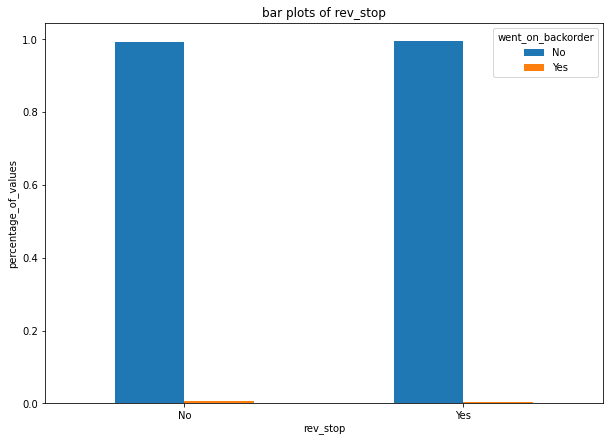

In [ ]:
count_values = df.groupby(['rev_stop','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('rev_stop')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of rev_stop")

#### Comment

- When rev_stop is NO ,product did not go to backorder 1,915119 times ie 99.27%.
- When rev_stop is NO, product did go to backorder 13,977 times ie 0.7245%.
- When rev_stop is YES,product did not go to backorder 835 times ie 99.52%.
- When rev_stop is YES,product did go to backorder 4 times ie 0.4768%.
- When rev_stop is NO ,The Ratio of products that went to backorder is very close to the Class Ratio.

The value of rev_stop being 0 or 1 , the chances of product going to backorder is extremely low.

#### Categorical Feature : stop_auto_buy             

went_on_backorder       No    Yes
stop_auto_buy                    
No                   69966    578
Yes                1845988  13403
went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.991807  0.008193
Yes                0.992792  0.007208


Text(0.5, 1.0, 'bar plots of stop_auto_buy')

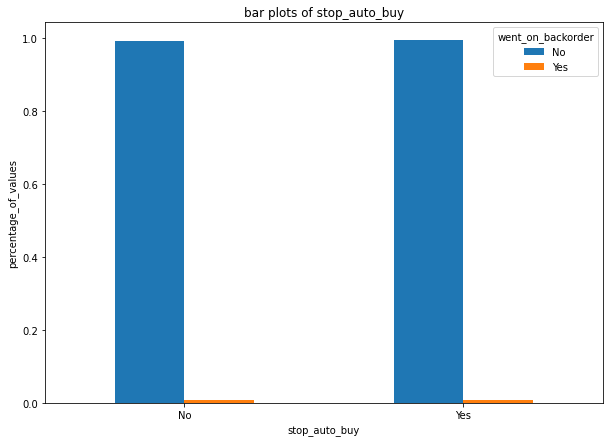

In [ ]:
count_values = df.groupby(['stop_auto_buy','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('stop_auto_buy')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of stop_auto_buy")

#### Comment

- When rev_stop is NO ,product did not go to backorder 69966 times ie 99.1807%.
- When rev_stop is NO, product did go to backorder 578 times ie 0.8193%.
- When rev_stop is YES,product did not go to backorder 1,845988 times ie 99.2792%.
- When rev_stop is YES,product did go to backorder 13403 times ie 0.7208%.
- When stop_auto_buy is YES ,The Ratio of products that went to backorder is very close to the Class Ratio.

With Feature stop_auto_buy being 0 or 1, the chance of product going to backorder is extremely low.

#### Categorical Features : deck_risk

went_on_backorder       No    Yes
deck_risk                        
No                 1482778  11704
Yes                 433176   2277
went_on_backorder        No       Yes
deck_risk                            
No                 0.992169  0.007831
Yes                0.994771  0.005229


Text(0.5, 1.0, 'bar plots of deck_risk')

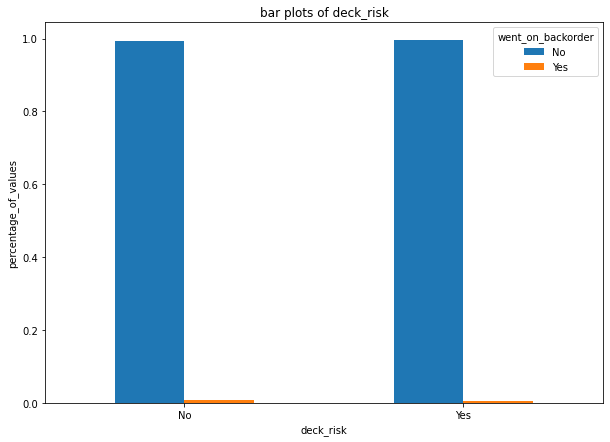

In [ ]:
count_values = df.groupby(['deck_risk','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('deck_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of deck_risk")

#### Comment

- When deck_risk is NO ,product did not go to backorder 1,482778   times ie 99.2169%.
- When deck_risk is NO, product did go to backorder 11704 times ie 0.7831%.
- When deck_risk is YES,product did not go to backorder 433176    times ie 99.4771%.
- When deck_risk is YES,product did go to backorder 2277 times ie 0.5229%

#### Categorical Features : ppap_risk

went_on_backorder       No    Yes
ppap_risk                        
No                 1685533  11850
Yes                 230421   2131
went_on_backorder        No       Yes
ppap_risk                            
No                 0.993019  0.006981
Yes                0.990836  0.009164


Text(0.5, 1.0, 'bar plots of ppap_risk')

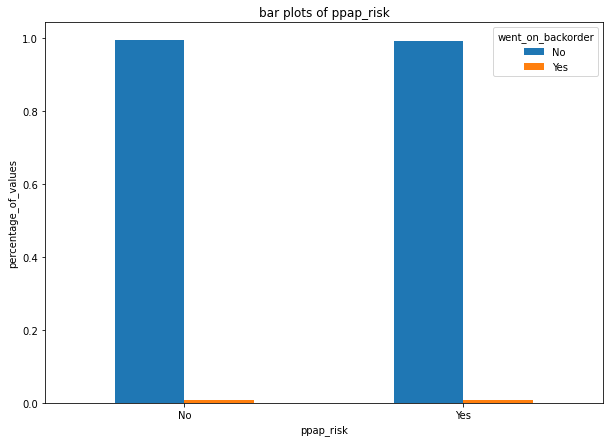

In [ ]:
count_values = df.groupby(['ppap_risk','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('ppap_risk')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of ppap_risk")

#### Comment

- When ppap_risk is NO ,product did not go to backorder 1,685533 times ie 99.3019%.
- When ppap_risk is NO, product did go to backorder 11850 times ie 0.6981%.
- When ppap_risk is YES,product did not go to backorder 230421 times ie 99.0836%.
- When ppap_risk is YES,product did go to backorder 2131 times ie 0.9164%

#### Categorical Features : oe_constraint 

went_on_backorder       No    Yes
oe_constraint                    
No                 1915671  13972
Yes                    283      9
went_on_backorder        No       Yes
oe_constraint                        
No                 0.992759  0.007241
Yes                0.969178  0.030822


Text(0.5, 1.0, 'bar plots of oe_constraint')

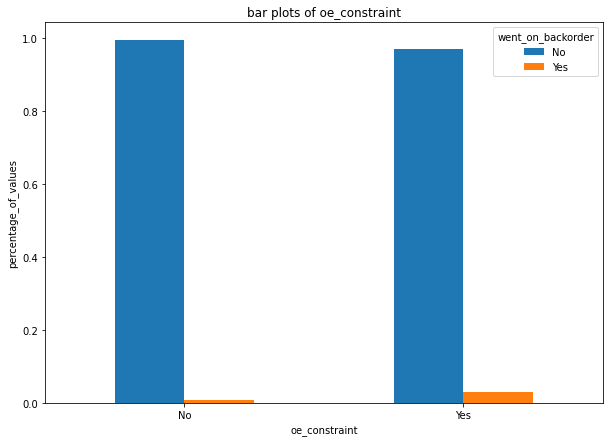

In [ ]:
count_values = df.groupby(['oe_constraint','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('oe_constraint')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of oe_constraint")

#### Comment

- When oe_constraint is NO ,product did not go to backorder 1,915671   times ie 99.2759%.
- When oe_constraint is NO, product did go to backorder 13972 times ie 0.7241%.
- When oe_constraint is YES,product did not go to backorder 283 times ie 96.9178%.
- When oe_constraint is YES,product did go to backorder 9 times ie 0.030822%

#### Categorical Features : potential_issue

went_on_backorder       No    Yes
potential_issue                  
No                 1915019  13927
Yes                    935     54
went_on_backorder        No       Yes
potential_issue                      
No                 0.992780  0.007220
Yes                0.945399  0.054601


Text(0.5, 1.0, 'bar plots of potential_issue')

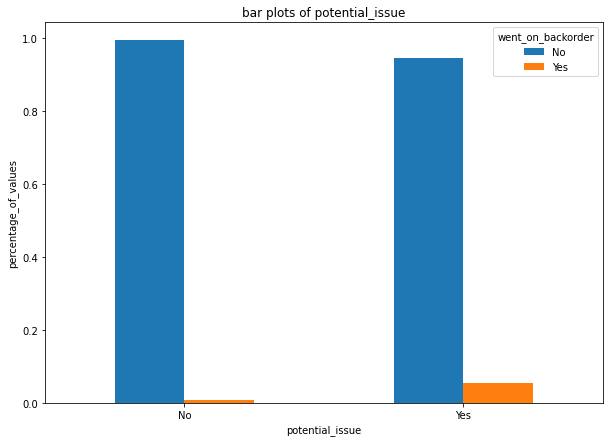

In [ ]:
count_values = df.groupby(['potential_issue','went_on_backorder']).size().unstack()

print(count_values)
percentage_of_values = count_values.T.div(count_values.T.sum()).T
 
print(percentage_of_values)

fig,ax = plt.subplots()
percentage_of_values.plot(kind='bar',ax=ax,figsize =(10,7))

ax.set_xlabel('potential_issue')
ax.set_xticklabels(['No','Yes'],rotation=0)
ax.set_ylabel("percentage_of_values")
ax.set_title("bar plots of potential_issue")

#### Comment

- When potential_issue is NO ,product did not go to backorder 1,915019 times ie 99.2780%.
- When potential_issue is NO, product did go to backorder 13927 times ie 0.7241%.
- When potential_issue is YES,product did not go to backorder 935 times ie 94.5399%.
- When potential_issue is YES,product did go to backorder 54 times ie 05.4601%

### Numerical Features : national_inv 

#### Violinplot


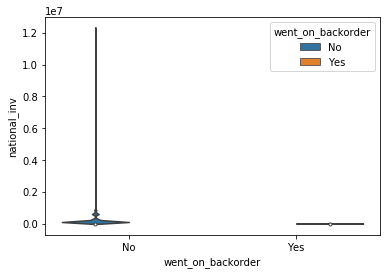

In [ ]:
#sns.boxplot(x=df['went_on_backorder'],y = df['national_inv'])
sns.violinplot(x = 'went_on_backorder',y = 'national_inv' ,hue = 'went_on_backorder', data = df,size=15,notch = True)

#### Comment
- The spread is very high and IQR is very small.
- Majority class has outliers , wheras in minority class the plots is not clear.
- There is a high density plot for majority class.
- There seems to be high variance in the scale of data of national_inv feature.None of the IQR is clearly visible implies that there are heavy outliers.
- It can be interpreted that for products that went to backorder had national_inv close to Single digit or 0 or negative.The products that did not go to backorder had enough national_inv available.

#### Violinplot with 1.5*IQR Method

We will select a range of data points with IQR method of Outlier Detection.

Reference : https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

In [ ]:
Q1_national_inv = df.national_inv.quantile(0.25) # Storing the 25th percentile value
Q3_national_inv = df.national_inv.quantile(0.75) # Storing the 75 th percentile value

IQR_national_inv = Q3_national_inv - Q1_national_inv  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_national_inv = Q1_national_inv - 1.5*IQR_national_inv 
upper_bound_national_inv = Q3_national_inv + 1.5*IQR_national_inv

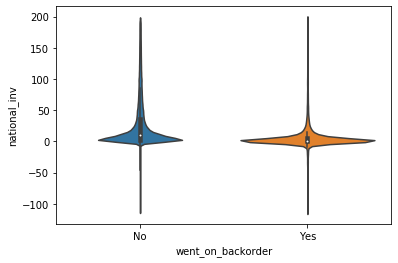

In [ ]:
range_national_inv = (df.national_inv >= lower_bound_national_inv) & (df.national_inv <= upper_bound_national_inv) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'national_inv' , data = df.loc[range_national_inv],size=15)

### Percentiles

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.national_inv.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.national_inv.quantile(i*0.01))
print("="*100)
print("Between 0-10 th percentile")
for i in range(0,10,1):
    print(i,"percentile of value is ",df.national_inv.quantile(i*0.01))

0 percentile of values is  -27256.0
10 percentile of values is  1.0
20 percentile of values is  3.0
30 percentile of values is  6.0
40 percentile of values is  10.0
50 percentile of values is  15.0
60 percentile of values is  27.0
70 percentile of values is  55.0
80 percentile of values is  119.0
90 percentile of values is  360.0
100 percentile of values is  12334404.0
Between 90-100 percentile
90 percentile of values is  360.0
91 percentile of values is  417.0
92 percentile of values is  490.0
93 percentile of values is  577.0
94 percentile of values is  722.0
95 percentile of values is  924.0
96 percentile of values is  1225.0
97 percentile of values is  1821.0
98 percentile of values is  3015.0
99 percentile of values is  5487.0
100 percentile of values is  12334404.0
Between 0-10 th percentile
0 percentile of value is  -27256.0
1 percentile of value is  0.0
2 percentile of value is  0.0
3 percentile of value is  0.0
4 percentile of value is  0.0
5 percentile of value is  0.0
6 perc

#### Comment
- First,The plot for No Category is more right skewed than that of Yes Category implying that we have more of those products with high national_inv value not going into backorder.Most of the observations are concentrated at the lower end of the plot.
- From the Box plot inside we can say that IQR for Yes category is smaller implying only a small set of products with small national_inv values are highly likely to go to backorder.The Spread is high but IQR is relatively smaller.
- From the plot we can see that there are products with national_inv in negative amount.
- As we can see that the 99th percentile and 0th percentiles values are extreme outliers , we will remove them in the data cleaning process

### Numerical Features : in_transit_qty

#### Violinplot

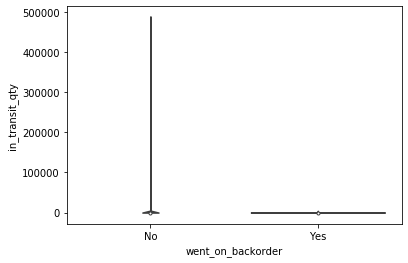

In [ ]:
sns.violinplot(x = 'went_on_backorder',y = 'in_transit_qty' , data = df,size=15)

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.in_transit_qty.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.in_transit_qty.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  1.0
90 percentile of values is  15.0
100 percentile of values is  489408.0
Between 90-100 percentile
90 percentile of values is  15.0
91 percentile of values is  20.0
92 percentile of values is  26.0
93 percentile of values is  35.0
94 percentile of values is  48.0
95 percentile of values is  66.0
96 percentile of values is  96.0
97 percentile of values is  145.0
98 percentile of values is  250.0
99 percentile of values is  565.0
100 percentile of values is  489408.0


In [ ]:
for i in np.arange(0.0,1.0,0.1):
    val = df['in_transit_qty'].values
    val = np.sort(val,axis=None)
    print("{} percentile value is {} ".format(99+i,val[int(len(val)*(float(99+i)/100))]))
print("100 percentile value is ",val[-1])

99.0 percentile value is 565.0 
99.1 percentile value is 630.0 
99.2 percentile value is 720.0 
99.3 percentile value is 830.0 
99.4 percentile value is 990.0 
99.5 percentile value is 1193.0 
99.6 percentile value is 1500.0 
99.7 percentile value is 2040.0 
99.8 percentile value is 3000.0 
99.9 percentile value is 5510.0 
100 percentile value is  489408.0


#### Comment
- Close to 80 % values are 0.The Spread of in_transit_qty is very high ranging from 0 to 489408. 
- From the plot we can see that there is a very small number of products that go into backorder and mostly all of them are close to 0.
- The width of Violin plot which tells about the Distribution plot of No Category appears to be small than that of Yes Category. This might indicate that products with values close to 0 have a higher chance of going to backorder
- We see that values above 99.9 percentile is outlier and it will be removed in data cleaning process

#### Data between 0.1 percentile to 99 percentile

In [ ]:
Q1_in_transit_qty = df.in_transit_qty.quantile(0) # Storing the 0.0th percentile value
Q3_in_transit_qty = df.in_transit_qty.quantile(0.99) # Storing the 99.9 th percentile value

IQR_in_transit_qty = Q3_in_transit_qty - Q1_in_transit_qty  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_in_transit_qty = Q1_in_transit_qty# - 1.5*IQR_in_transit_qty 
upper_bound_in_transit_qty = Q3_in_transit_qty #+ 1.5*IQR_in_transit_qty

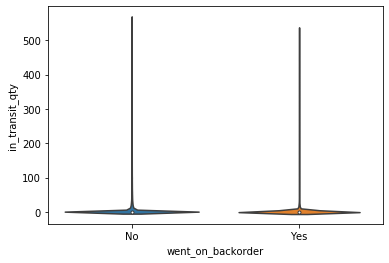

In [ ]:
range_inTransitQty = (df.in_transit_qty >= lower_bound_in_transit_qty) & (df.in_transit_qty <= upper_bound_in_transit_qty) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'in_transit_qty' , data = df.loc[range_inTransitQty],showfliers=False)

#### Comment

- The Spread as well as the Boxplot inside both Yes and No Category are similar.
- The Median values are roughly the same.
- Both the plots being sharply peaked, there is High Kurtosis.
- The distribution is right skewed as there are small number of products with high in_transit_qty
- The plot is highly peaked around 0 and the distribution is overlapping.

### Numerical Feature : forecast_3_months,forecast_6_months,forecast_9_months

#### Violinplot

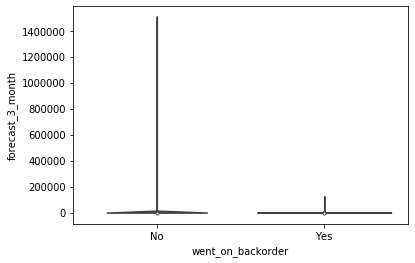

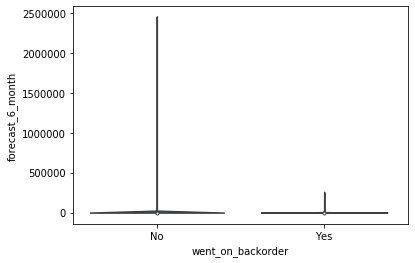

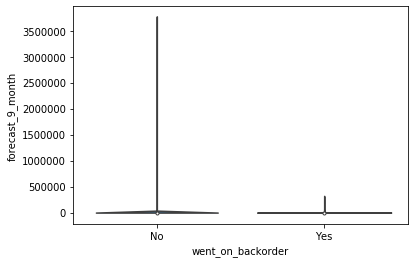

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['forecast_3_month'],showfliers=False)
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['forecast_6_month'],showfliers=False)
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['forecast_9_month'],showfliers=False)
plt.show()

#### Comment
The plots of all 3 forecast features is almost similar. On the y axis the range values for forecast features have changed as we went from 3 months to 9 months. Products with high forecast values are less likely to go to backorder.There is a very small range of products that has a chance of going to backorder. 


#### Percentiles for Forecast_3_months

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_3_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_3_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  1.0
80 percentile of values is  12.0
90 percentile of values is  83.0
100 percentile of values is  1510592.0
Between 90-100 percentile
90 percentile of values is  83.0
91 percentile of values is  100.0
92 percentile of values is  131.0
93 percentile of values is  172.0
94 percentile of values is  224.0
95 percentile of values is  300.0
96 percentile of values is  425.0
97 percentile of values is  630.0
98 percentile of values is  1042.3200000000652
99 percentile of values is  2280.0
100 percentile of values is  1510592.0


### Percentiles for Forecast 6 months

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_6_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_6_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  5.0
80 percentile of values is  30.0
90 percentile of values is  176.0
100 percentile of values is  2461360.0
Between 90-100 percentile
90 percentile of values is  176.0
91 percentile of values is  214.0
92 percentile of values is  270.0
93 percentile of values is  345.0
94 percentile of values is  450.0
95 percentile of values is  600.0
96 percentile of values is  840.0
97 percentile of values is  1213.0
98 percentile of values is  2000.0
99 percentile of values is  4335.659999999916
100 percentile of values is  2461360.0


### Percentiles for Forecast 9 months

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.forecast_9_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.forecast_9_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  8.0
80 percentile of values is  48.0
90 percentile of values is  262.0
100 percentile of values is  3777304.0
Between 90-100 percentile
90 percentile of values is  262.0
91 percentile of values is  323.0
92 percentile of values is  403.0
93 percentile of values is  505.0
94 percentile of values is  665.0
95 percentile of values is  896.0
96 percentile of values is  1224.0
97 percentile of values is  1809.0
98 percentile of values is  3000.0
99 percentile of values is  6316.0
100 percentile of values is  3777304.0


#### Observation from percentiles
- Between 60-70% of values are 0.
- In 90 percentile and 100 percentile values , there is a huge difference.After 99 percentile , in the last 1 percent values are drastically increasing. Will have to remove these outlier datapoints from the dataframe in the data cleaning process.
- Since the values upto 90 percentile are normally increasing, we can perform boxplot for 90 percentile values.
- From the percentiles we see that the values above 99th percentiles are extreme values and can be considered as Outliers

#### Violinplot with 1.5*IQR Method

In [ ]:
Q1_forecast_3_month = df.forecast_3_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_3_month = df.forecast_3_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_3_month = Q3_forecast_3_month - Q1_forecast_3_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_3_month = Q1_forecast_3_month - 1.5*IQR_forecast_3_month 
upper_bound_forecast_3_month = Q3_forecast_3_month + 1.5*IQR_forecast_3_month

Q1_forecast_6_month = df.forecast_6_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_6_month = df.forecast_6_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_6_month = Q3_forecast_6_month - Q1_forecast_6_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_6_month = Q1_forecast_6_month - 1.5*IQR_forecast_6_month 
upper_bound_forecast_6_month = Q3_forecast_6_month + 1.5*IQR_forecast_6_month

Q1_forecast_9_month = df.forecast_9_month.quantile(0.25) # Storing the 25th percentile value
Q3_forecast_9_month = df.forecast_9_month.quantile(0.75) # Storing the 75 th percentile value

IQR_forecast_9_month = Q3_forecast_9_month - Q1_forecast_9_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_forecast_9_month = Q1_forecast_9_month - 1.5*IQR_forecast_9_month 
upper_bound_forecast_9_month = Q3_forecast_9_month + 1.5*IQR_forecast_9_month


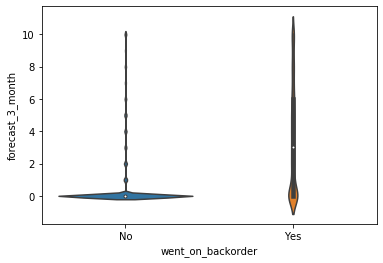

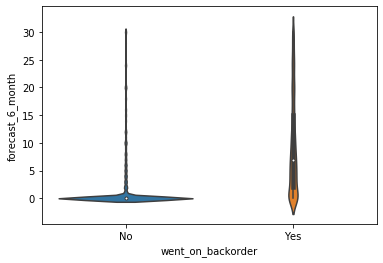

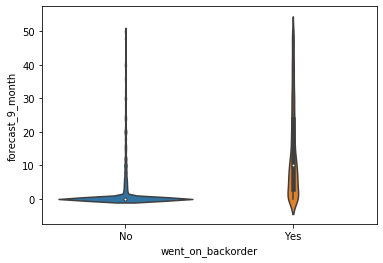

In [ ]:
range_forecast_3_months = (df.forecast_3_month >= lower_bound_forecast_3_month) & (df.forecast_3_month <= upper_bound_forecast_3_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_3_month',data = df.loc[range_forecast_3_months])
plt.show()

range_forecast_6_months = (df.forecast_6_month >= lower_bound_forecast_6_month) & (df.forecast_6_month <= upper_bound_forecast_6_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_6_month',data = df.loc[range_forecast_6_months])
plt.show()

range_forecast_9_months = (df.forecast_9_month >= lower_bound_forecast_9_month) & (df.forecast_9_month <= upper_bound_forecast_9_month) # Range of Data
sns.violinplot(x = 'went_on_backorder',y = 'forecast_9_month',data = df.loc[range_forecast_9_months])
plt.show()

#### Comment
- Despite the spread being Similar, the IQR Range varies.Boxplot shows higher Median value and larger boxplot as that of No Category.
- For the 3 months forecast there is high peak at around 0 and thereafter small peaks at regular interval in the Majority class.
- In the Minority class the peak is low and has a thicker tails throughout in all the forecast features.
- The Median values are higher for the products that went on backorder. The majority class median values have been near 0,whereas the minority class median values are above 0.Through this we can infer that products with forecast in the range 2-10 are more likely to go the backorder.
- With Percentiles we saw that the values above 99 percentiles are extremely high and are outliers

### Numerical Features :Lead Time

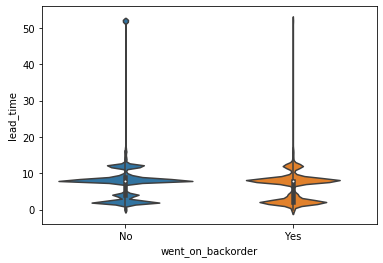

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['lead_time'])

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.lead_time.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.lead_time.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  2.0
20 percentile of values is  2.0
30 percentile of values is  4.0
40 percentile of values is  8.0
50 percentile of values is  8.0
60 percentile of values is  8.0
70 percentile of values is  8.0
80 percentile of values is  9.0
90 percentile of values is  12.0
100 percentile of values is  52.0
Between 90-100 percentile
90 percentile of values is  12.0
91 percentile of values is  12.0
92 percentile of values is  12.0
93 percentile of values is  12.0
94 percentile of values is  12.0
95 percentile of values is  12.0
96 percentile of values is  13.0
97 percentile of values is  15.0
98 percentile of values is  17.0
99 percentile of values is  52.0
100 percentile of values is  52.0


#### Comment
- Both the Category plots seems to Wavy due to uneven distribution of data points
- With Boxplot inside the Median value is near 10.By looking at boxplot we can easily interpret that most of the data os concentrated on the lower end of plot.
- Each datapoint had an equivalent influnce on the final distribution,as there are more datapoints in some region resulting in 
    increasing height of density curve in that area and vice versa.

### Numerical Feature : Sales_1_month , Sales_3_months, Sales_6_months,Sales_9_months

#### Violin Plot

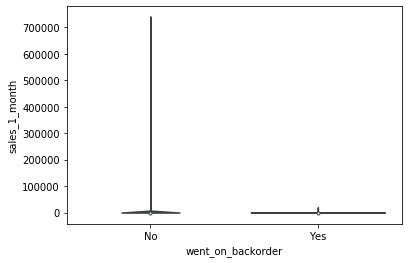

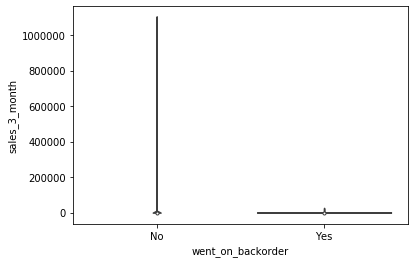

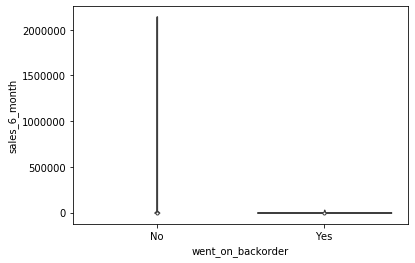

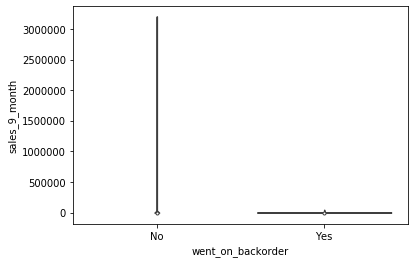

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['sales_1_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_3_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_6_month'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['sales_9_month'])
plt.show()

### Percentiles for Sales_1_month

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_1_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_1_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  1.0
70 percentile of values is  2.0
80 percentile of values is  8.0
90 percentile of values is  34.0
100 percentile of values is  741774.0
Between 90-100 percentile
90 percentile of values is  34.0
91 percentile of values is  41.0
92 percentile of values is  50.0
93 percentile of values is  63.0
94 percentile of values is  81.0
95 percentile of values is  106.0
96 percentile of values is  146.0
97 percentile of values is  211.0
98 percentile of values is  336.0
99 percentile of values is  693.0
100 percentile of values is  741774.0


### Percentiles for Sales_3_month

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_3_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_3_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  1.0
60 percentile of values is  3.0
70 percentile of values is  9.0
80 percentile of values is  26.0
90 percentile of values is  113.0
100 percentile of values is  1105478.0
Between 90-100 percentile
90 percentile of values is  113.0
91 percentile of values is  137.0
92 percentile of values is  168.0
93 percentile of values is  209.0
94 percentile of values is  267.0
95 percentile of values is  349.0
96 percentile of values is  479.0
97 percentile of values is  688.0
98 percentile of values is  1087.0
99 percentile of values is  2229.0
100 percentile of values is  1105478.0


### Percentiles for Sales_6_month

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_6_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_6_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  1.0
50 percentile of values is  2.0
60 percentile of values is  7.0
70 percentile of values is  18.0
80 percentile of values is  55.0
90 percentile of values is  232.0
100 percentile of values is  2146625.0
Between 90-100 percentile
90 percentile of values is  232.0
91 percentile of values is  280.0
92 percentile of values is  340.0
93 percentile of values is  422.0
94 percentile of values is  535.0
95 percentile of values is  696.0
96 percentile of values is  952.0
97 percentile of values is  1352.0
98 percentile of values is  2153.0
99 percentile of values is  4410.0
100 percentile of values is  2146625.0


### Percentiles for Sales_9_month

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.sales_9_month.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.sales_9_month.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  1.0
50 percentile of values is  4.0
60 percentile of values is  10.0
70 percentile of values is  27.0
80 percentile of values is  84.0
90 percentile of values is  354.0
100 percentile of values is  3205172.0
Between 90-100 percentile
90 percentile of values is  354.0
91 percentile of values is  425.0
92 percentile of values is  517.0
93 percentile of values is  643.0
94 percentile of values is  812.0
95 percentile of values is  1060.0
96 percentile of values is  1451.0
97 percentile of values is  2052.0
98 percentile of values is  3277.0
99 percentile of values is  6698.0
100 percentile of values is  3205172.0


#### Comment

- The majority class contains high outliers giving no clear insights for boxplots and distributions
- The Spread of data for products that dont go to backorder is high and is changing for every sales feature.
- The plots of Sales features are almost similar except the Sales_1_month where there are more products in No Category near 0.

#### With 1.5*IQR Method

In [ ]:
Q1_sales_1_month = df.sales_1_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_1_month = df.sales_1_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_1_month = Q3_sales_1_month - Q1_sales_1_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_1_month = Q1_sales_1_month - 1.5*IQR_sales_1_month 
upper_bound_sales_1_month = Q3_sales_1_month + 1.5*IQR_sales_1_month

Q1_sales_3_month = df.sales_3_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_3_month = df.sales_3_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_3_month = Q3_sales_3_month - Q1_sales_3_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_3_month = Q1_sales_3_month - 1.5*IQR_sales_3_month
upper_bound_sales_3_month = Q3_sales_3_month + 1.5*IQR_sales_3_month

Q1_sales_6_month = df.sales_6_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_6_month = df.sales_6_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_6_month = Q3_sales_6_month - Q1_sales_6_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_6_month = Q1_sales_6_month - 1.5*IQR_sales_6_month
upper_bound_sales_6_month = Q3_sales_6_month + 1.5*IQR_sales_6_month

Q1_sales_9_month = df.sales_9_month.quantile(0.25) # Storing the 25th percentile value
Q3_sales_9_month = df.sales_9_month.quantile(0.75) # Storing the 75 th percentile value

IQR_sales_9_month = Q3_sales_9_month - Q1_sales_9_month  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_sales_9_month = Q1_sales_9_month - 1.5*IQR_sales_9_month
upper_bound_sales_9_month = Q3_sales_9_month + 1.5*IQR_sales_9_month


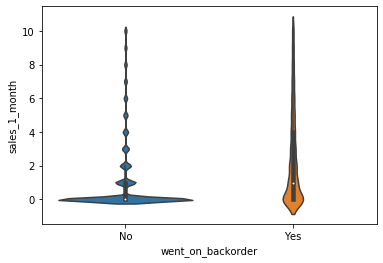

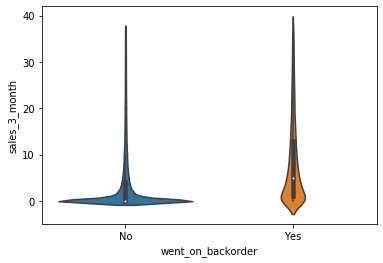

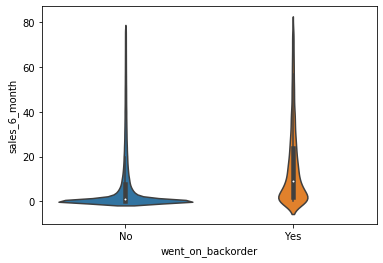

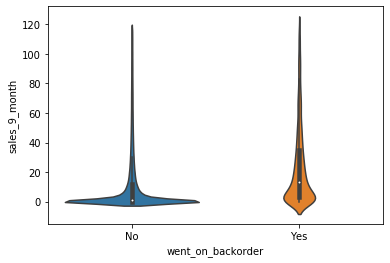

In [ ]:
range_sales_1_month = (df.sales_1_month >= lower_bound_sales_1_month) & (df.sales_1_month <= upper_bound_sales_1_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_1_month',data = df.loc[range_sales_1_month])
plt.show()

range_sales_3_month = (df.sales_3_month >= lower_bound_sales_3_month) & (df.sales_3_month <= upper_bound_sales_3_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_3_month',data = df.loc[range_sales_3_month])
plt.show()

range_sales_6_month = (df.sales_6_month >= lower_bound_sales_6_month) & (df.sales_6_month <= upper_bound_sales_6_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_6_month',data = df.loc[range_sales_6_month])
plt.show()

range_sales_9_month = (df.sales_9_month >= lower_bound_sales_9_month) & (df.sales_9_month <= upper_bound_sales_9_month)
sns.violinplot(x = 'went_on_backorder',y = 'sales_9_month',data = df.loc[range_sales_9_month])
plt.show()

#### Comment
- With 1.5*IQR , we bring down the range to 0 - 200. 
- The Median value is greater for products that went to backorder that median of products that did not.The Boxplot is comparetively larger for Yes Category.
- In the plot of No Category, There is sharp peak of values near 0 implying higher Kurtosis and higher concentration of product datapoints. As we slope down the peak there is small of skewness in the plot which implies that there are few products which 
  had higher sales in their respective months.
- In the plot of Yes Category, the peak is more flattened as that of No Category  implying lower Kurtosis and has a Median value above 0 or above the No Category Median value.Yes Category plot has longer tail.
- In the boxplot inside, the gap between 50 th percentile and 75th percentile is more.Most of the values are concentrated towards the lower end of plot.Median values of products that went to backorder are higher to that of majority class.
- With Percentiles of all sales features , we see that the value above 99th percentile is extremely high and can be terms as Outlier and will be removed the data cleaning process
- The plots of sales features are almost similar except the 1 month Sales feature where there are small peaks at regular intervals.


### Numerical Features : pieces_past_due

#### Violinplot

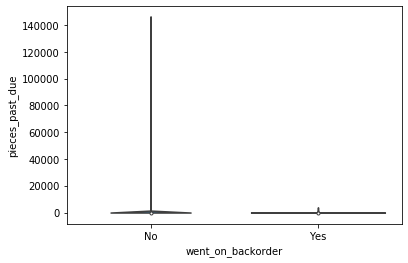

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['pieces_past_due'])

#### Percentiles

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.pieces_past_due.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.pieces_past_due.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  0.0
90 percentile of values is  0.0
100 percentile of values is  146496.0
Between 90-100 percentile
90 percentile of values is  0.0
91 percentile of values is  0.0
92 percentile of values is  0.0
93 percentile of values is  0.0
94 percentile of values is  0.0
95 percentile of values is  0.0
96 percentile of values is  0.0
97 percentile of values is  0.0
98 percentile of values is  0.0
99 percentile of values is  4.0
100 percentile of values is  146496.0


#### Comment

- From Violinplot we see that there products which dont go to backorder and have high peices_parts_due.98% of products have have value 0. Having high percentage of 0s, we will ignore this feature. 

### Numerical Feature : min_bank

#### Violinplots

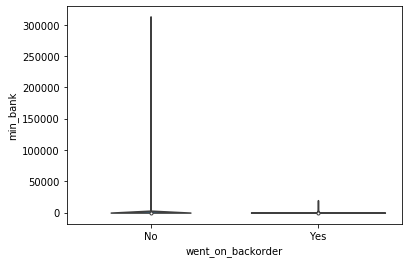

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['min_bank'])

### Percentiles

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.min_bank.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.min_bank.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  1.0
70 percentile of values is  2.0
80 percentile of values is  10.0
90 percentile of values is  46.0
100 percentile of values is  313319.0
Between 90-100 percentile
90 percentile of values is  46.0
91 percentile of values is  54.0
92 percentile of values is  64.0
93 percentile of values is  78.0
94 percentile of values is  97.0
95 percentile of values is  125.0
96 percentile of values is  165.0
97 percentile of values is  226.0
98 percentile of values is  340.0
99 percentile of values is  679.6599999999162
100 percentile of values is  313319.0


#### Comment
- From the plot we can say that the plots are very small and nothing is clear.
- There are lot of products whose min_bank value is in the Starting part of the Range.Using 1.5*IQR we can look deeply into these products for better insights.

####  1.5 IQR Violinplot

In [ ]:
Q1_min_bank = df.min_bank.quantile(0.25) # Storing the 25th percentile value
Q3_min_bank = df.min_bank.quantile(0.75) # Storing the 75 th percentile value

IQR_min_bank = Q3_min_bank - Q1_min_bank  #Calculating the IQR

# Trying to detect outliers using this method where we define a new range
lower_bound_min_bank = Q1_min_bank - 1.5*IQR_min_bank
upper_bound_min_bank = Q3_min_bank + 1.5*IQR_min_bank

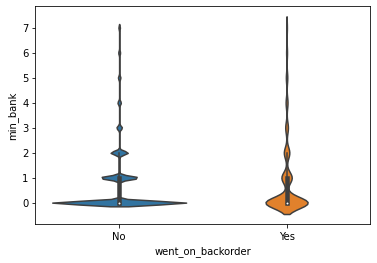

In [ ]:
range_min_bank = (df.min_bank >= lower_bound_min_bank) & (df.min_bank <= upper_bound_min_bank)
sns.violinplot(x = 'went_on_backorder',y = 'min_bank',data = df.loc[range_min_bank],showfliers = False)
plt.show()

#### Comment
- Most of the products have min_bank value of 0.Median value for both the Categories is 0 and we have same size Boxplot for both the Categories.
- Both Yes and No Category plots are peaked near 0. No Category plot being more peaked than Yes Category has higher Kurtosis.
- Both the distributions have smaller peaks at regular intervals as min_bank increases.
- There seems to be overlap among the datapoints for this feature.
- We see that values above 99 percentiles are extremely high and can be removed as an outlier in the data cleaning prcocess.

### Numerical Features : perf_6_month_avg,perf_12_month_avg

#### Violinplot

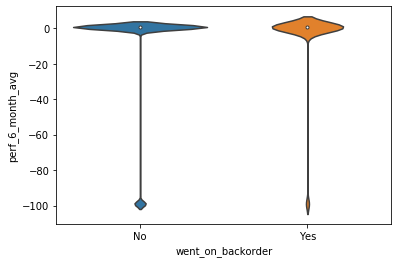

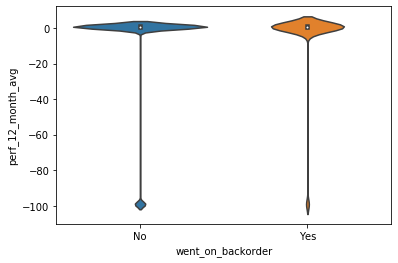

In [ ]:
sns.violinplot(x=df['went_on_backorder'],y = df['perf_6_month_avg'])
plt.show()

sns.violinplot(x=df['went_on_backorder'],y = df['perf_12_month_avg'])
plt.show()

#### Comment
- Most of the Performance average values of 6 and 12 months lie around 1 to -1. For many products the performance average value is -99.
- Median value of Boxplot is somewhere near 0. Both have small IQR.
- No Category has sharp peak at 0 impying higher Kurtosis, higher concentration of datapoints as compared to the plot of Yes Category. THe Distribution plots are almost Gaussian but at the tail there is small amount of skewness , as there are nore few products that have lower value of performance average.
  

### Numeical Features : local_bo_qty

#### Violinplot

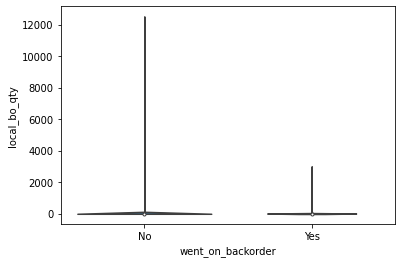

In [ ]:
range_local_bo_qty = (df.local_bo_qty >= lower_bound) & (df.local_bo_qty <= upper_bound)
sns.violinplot(x=df['went_on_backorder'],y = df['local_bo_qty'],data = df.loc[range_local_bo_qty])

#### Percentiles

In [ ]:
for i in range(0,110,10):
    print(i,"percentile of values is ",df.local_bo_qty.quantile(i*0.01))
print("="*100)
print("Between 90-100 percentile")
for i in range(90,101,1):
    print(i,"percentile of values is ",df.local_bo_qty.quantile(i*0.01))

0 percentile of values is  0.0
10 percentile of values is  0.0
20 percentile of values is  0.0
30 percentile of values is  0.0
40 percentile of values is  0.0
50 percentile of values is  0.0
60 percentile of values is  0.0
70 percentile of values is  0.0
80 percentile of values is  0.0
90 percentile of values is  0.0
100 percentile of values is  12530.0
Between 90-100 percentile
90 percentile of values is  0.0
91 percentile of values is  0.0
92 percentile of values is  0.0
93 percentile of values is  0.0
94 percentile of values is  0.0
95 percentile of values is  0.0
96 percentile of values is  0.0
97 percentile of values is  0.0
98 percentile of values is  0.0
99 percentile of values is  1.0
100 percentile of values is  12530.0


#### Comment 
- From the plot we can say that products with higher value of local_bo_qty will not go to backorder. Most of the values are near 0 implies that the features can be skipped/ignored.From the percentiles we can see that 98% of values are 0. We will further make correlation to see if its valuable for acheiving the target variable.

### Bivariate Analysis

#### Pair Plot for forecast features and Sales Features

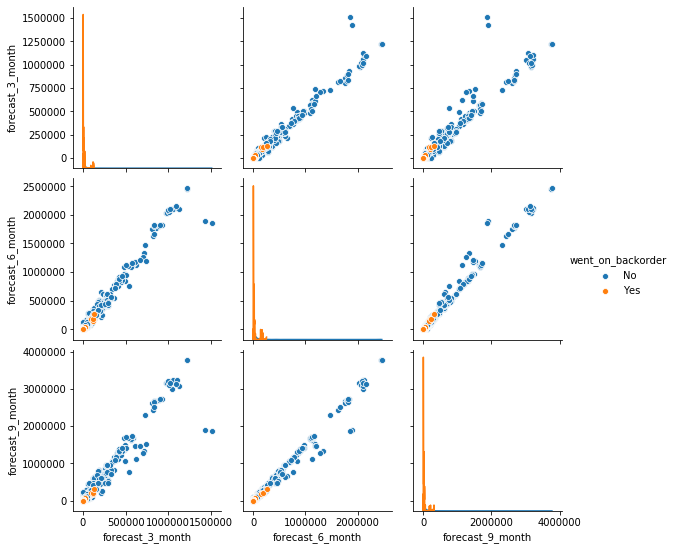

In [ ]:
sns.pairplot(df[['forecast_3_month','forecast_6_month','forecast_9_month','went_on_backorder']],hue = 'went_on_backorder')

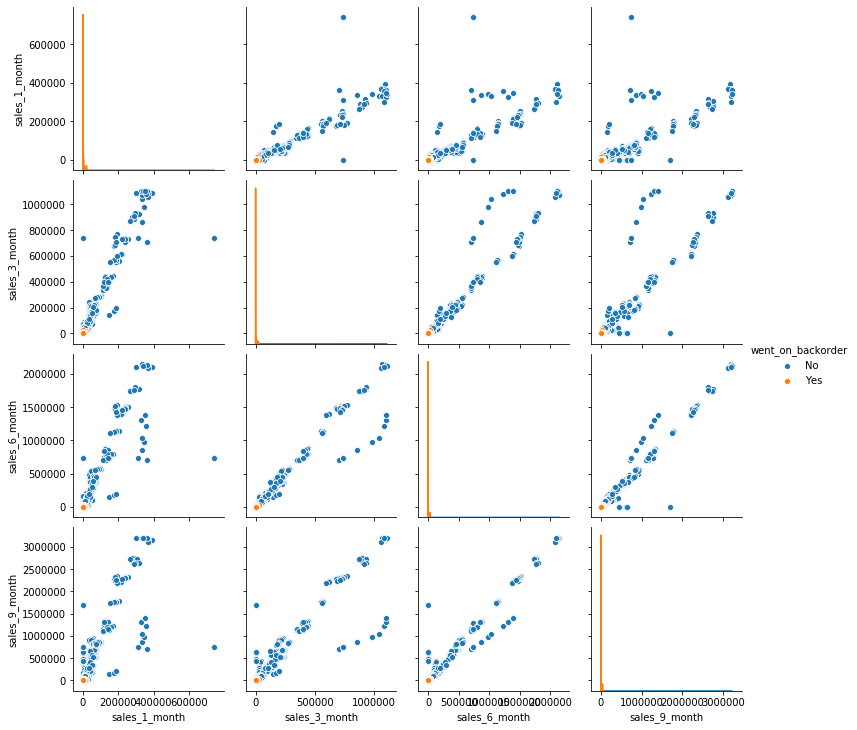

In [ ]:
sns.pairplot(df[['sales_1_month','sales_3_month','sales_6_month','sales_9_month','went_on_backorder']],hue = 'went_on_backorder')

#### Comment


- From the pair plots of forecast and sales features we can say that products with lower value of forecast and sales features are more likely to go backorder. The Density plots also show that there are more number of products near the starting range which would go to backorder.
- Forecast and sales features make linear correlation with each other. 

### Correlation Matrix

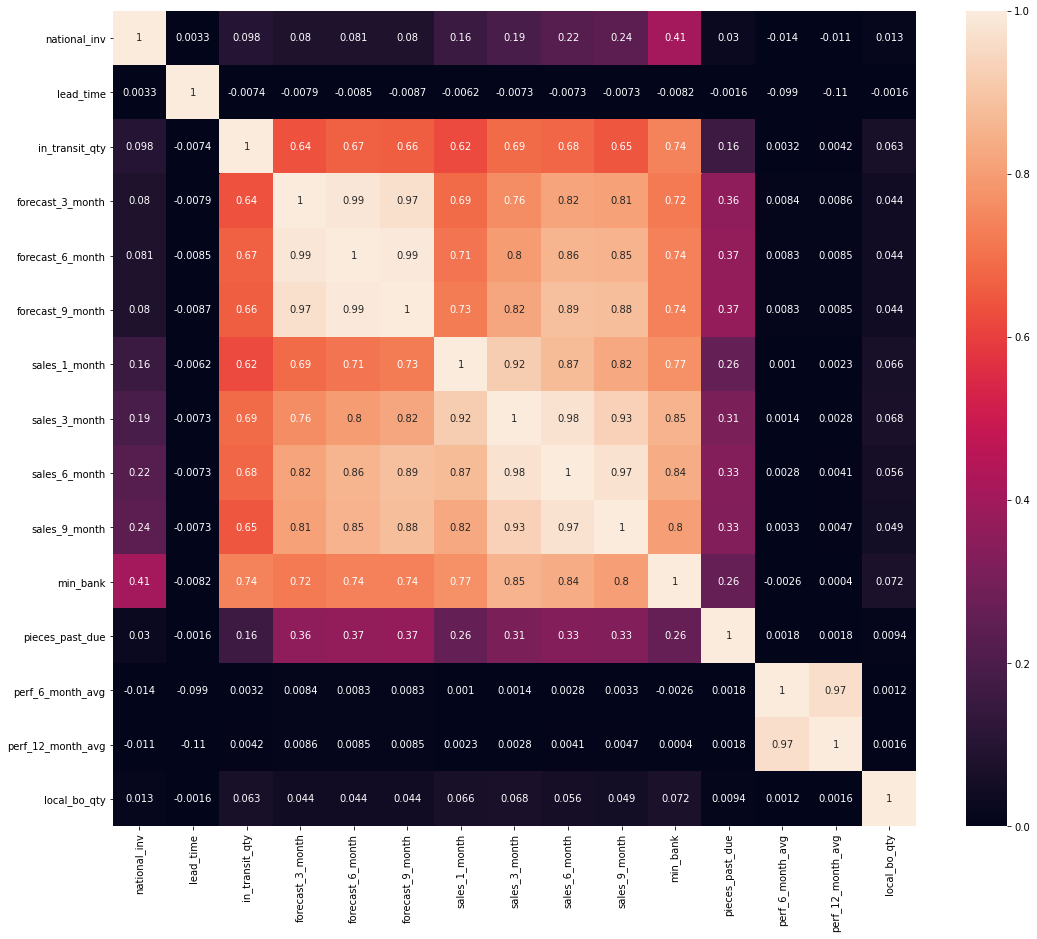

In [ ]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)
#df.corr() -> creates correlation matrix between all the features
# vmin,vmax -> Values to display intensity of colormap
#annot -> #if True,writes the intensity value of colormap

#### Comment

- From the correlation matrix , we can easily interpret that features from in_transit_qty to min_bank are more correlated with each other. Also the perf_6_months_avg and perf_12_months_avg is highly correlated with each other.

- Apart from the above mentioned features, other features are very weakly correlated.

## Finding Correlation between 2 Categorical Features



### Chi Square Test

The Chi Sqaure test statistical hypothesis is a test for checking Independence between the two categorical variables. The aim is to conclude whether the given two variables are related to each other.

**Null Hypothesis** : There is no correlation between the Categorical feature and target variable.

**Alternate Hypothesis** : There is a correlation between the Categorical feature and target variable.

We can verify the hypothesis using **p-value**.

Significance factor will help us determine whether the given two features have considerable significance. Significance factor is also called as Alpha value.
Usually, alpha value of 0.05 is chosen.
If the p-value is strictly greater than alpha value , then H0 ie Null Hypothesis holds true.

In [ ]:
categorical_columns = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
target_variable="went_on_backorder"

In [ ]:
for cat in categorical_columns:
  table = pd.crosstab(df['went_on_backorder'],df[cat])
  stats,p,dof,expected = chi2_contingency(table)
  alpha=0.05
  print("p-value is "+str(p))
  if p <= alpha:
    print("There is correlation between "+target_variable+" and "+cat+". Reject the Null Hypothesis H0")
  else:
    print("There is no correlation between "+target_variable+" and "+cat+". Accept the Null Hypothesis H0")

p-value is 0.5205331495379879
There is no correlation between went_on_backorder and rev_stop. Accept the Null Hypothesis H0
p-value is 0.0026469314858122623
There is correlation between went_on_backorder and stop_auto_buy. Reject the Null Hypothesis H0
p-value is 3.0994069960624216e-31
There is correlation between went_on_backorder and ppap_risk. Reject the Null Hypothesis H0
p-value is 1.0521651295231445e-05
There is correlation between went_on_backorder and oe_constraint. Reject the Null Hypothesis H0
p-value is 5.933788521669091e-71
There is correlation between went_on_backorder and deck_risk. Reject the Null Hypothesis H0
p-value is 1.204865270976099e-67
There is correlation between went_on_backorder and potential_issue. Reject the Null Hypothesis H0


For the features that have p-value higher than the significance factor value ie 0.05, the features are not correlated. In our case , the rev_stop features is not correlated to the target variable and all other features are correlated to the target variable.

## Finding Correlation between Categorical and Numerical Feature using Point Biserial Correlation

The Point Biserial Correlation is used to measure the correlation between a Categorical Variable(Binary Category) and Continous Variable

The Correlation coeffecients varies between -1 to +1 with 0 implying No Correlation.

**Null Hypothesis** : There is no correlation between the two features.Features.

**Alternate Hypothesis** : There is a correlation between the two features.

We can verify the hypothesis using **p-value**.

In [ ]:
# copy the dataframe into another variable to work on correlation
copy_df = df.copy()

In [ ]:
#convert Categories Yes and No to 0s and 1s
copy_df['went_on_backorder'].replace({'Yes':1,'No':0},inplace=True)
copy_df['went_on_backorder']=copy_df['went_on_backorder'].astype(int)

In [ ]:
numerical_features = ['national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty']

In [ ]:
#filling the Nan values using median imputation to find correlation
medianValue = copy_df['lead_time'].median()
copy_df['lead_time'] = copy_df['lead_time'].fillna(medianValue)

In [ ]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pointbiserialr.html
# https://dzone.com/articles/correlation-between-categorical-and-continuous-var-1#:~:text=Point%20Biserial%20Correlation,corr()%20function.
alpha=0.05
for num in numerical_features:
  p_value = stats.pointbiserialr(copy_df['went_on_backorder'].values.ravel(),copy_df[num])[1]
  #print("p-value is :"+str(p_value))
  if p_value < alpha:
    print("p-value = "+str(p_value)+". There is a correlation between "+target_variable+" and "+num+". Reject Null Hypothesis H0")
  else:
    print("p-value = "+str(p_value)+". There is No correlation between "+target_variable+" and "+num+". Accept Null Hypothesis H0")

p-value = 0.05648360747113057. There is No correlation between went_on_backorder and national_inv. Accept Null Hypothesis H0
p-value = 3.7681637480219344e-146. There is a correlation between went_on_backorder and lead_time. Reject Null Hypothesis H0
p-value = 0.00044449212780585704. There is a correlation between went_on_backorder and in_transit_qty. Reject Null Hypothesis H0
p-value = 0.9318196770853049. There is No correlation between went_on_backorder and forecast_3_month. Accept Null Hypothesis H0
p-value = 0.4005465176314466. There is No correlation between went_on_backorder and forecast_6_month. Accept Null Hypothesis H0
p-value = 0.24295111629106997. There is No correlation between went_on_backorder and forecast_9_month. Accept Null Hypothesis H0
p-value = 0.10420189854918474. There is No correlation between went_on_backorder and sales_1_month. Accept Null Hypothesis H0
p-value = 0.03896043774519777. There is a correlation between went_on_backorder and sales_3_month. Reject Null

- For the Lead_time feature we added median imputation in order to perform the correlation between the categorical and numerical variables using Point Biserial correlation.
There are variables with p value greater than 0.05 we accept the Null Hypothesis that they are not correlated. For variables with p value less than 0.05 we reject the Null hypothesis.
- From the statistical test performed we see that national_inv , forecast features and sales 1 month features are not correlated to the target variable.

## Data Preprocessing  

### Converting Target Variable to 0 and 1

In [ ]:
#Converting Target Variable to 0 and 1
df['went_on_backorder'].replace({'Yes':1,'No':0},inplace=True)
df['went_on_backorder'].astype(int)

0          0
1          0
2          0
3          0
4          0
          ..
1929930    0
1929931    0
1929932    0
1929933    0
1929934    0
Name: went_on_backorder, Length: 1929935, dtype: int64

### Check for Number of 0s in Numerical Features and drop columns if 0s are more than 95%.

In [ ]:
# Drop Columns if 95% values are 0
zero_columns = []
for col in df.columns:
    if col!='went_on_backorder' and col!='sku':
        value = df[col].value_counts()
        if 0 in value:
            if value[0] >= (0.95*df.shape[0]):
                zero_columns.append(col)
                print(col,"-> percentage of zeros : ",(value[0]*100/df.shape[0]),"%")

pieces_past_due -> percentage of zeros :  98.53347392528764 %
local_bo_qty -> percentage of zeros :  98.64223406487783 %


In [ ]:
df = df.drop(columns=zero_columns,axis=1)

### Replacing -99 by Nan in performance column

In [ ]:
# replacing -99 by Nan in performance column
df.perf_6_month_avg.replace({-99.0 : np.nan},inplace=True)
df.perf_12_month_avg.replace({-99.0 : np.nan},inplace=True)

### Converting Categorical Features

In [ ]:
categorical_columns = ['rev_stop','stop_auto_buy','ppap_risk','oe_constraint','deck_risk','potential_issue']
for col in categorical_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)
    df[col]=df[col].astype(int)

### Removing Outlier Datapoints from DataFrame

In [ ]:
old_shape = df.shape[0]

In [ ]:
df = df[(df.national_inv >= 0.000) & (df.national_inv <= 5487.000) & (df.in_transit_qty <= 5510.000 )   &\
  (df.forecast_3_month <= 2280.000) & (df.forecast_6_month <= 4335.659999999916) &\
  (df.forecast_9_month <= 6316.000) & (df.sales_1_month <= 693.000) & (df.sales_3_month <= 2229.000) &\
  (df.sales_6_month <= 4410.000) & (df.sales_9_month <= 6698.000) & (df.min_bank <= 679.6599999999162)]

In [ ]:
new_shape = df.shape[0]

In [ ]:
print("Number of Outliers removed : ",old_shape-new_shape)

Number of Outliers removed :  48564


In [ ]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.881371e+06,1.768920e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.738148e+06,1.745962e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06,1.881371e+06
mean,1.376750e+02,7.879902e+00,1.145663e+01,3.950405e+01,7.661432e+01,1.140410e+02,1.386159e+01,4.505858e+01,9.018180e+01,1.369531e+02,1.555334e+01,4.597711e-04,7.812620e-01,7.763474e-01,2.293875e-01,1.179991e-04,1.206168e-01,9.644472e-01,3.965193e-04,6.800891e-03
std,4.669358e+02,7.043846e+00,7.915361e+01,1.639866e+02,3.039033e+02,4.477455e+02,5.157486e+01,1.633873e+02,3.228384e+02,4.898747e+02,5.270539e+01,2.143735e-02,2.369360e-01,2.304170e-01,4.204390e-01,1.086210e-02,3.256815e-01,1.851724e-01,1.990885e-02,8.218663e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,6.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,8.400000e-01,8.300000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,7.200000e+01,9.000000e+00,0.000000e+00,3.000000e+00,1.000000e+01,1.700000e+01,4.000000e+00,1.200000e+01,2.600000e+01,4.000000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.487000e+03,5.200000e+01,5.300000e+03,2.280000e+03,4.320000e+03,6.315000e+03,6.930000e+02,2.229000e+03,4.410000e+03,6.698000e+03,6.790000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Train Test Split

In [ ]:
# Assigning the Target Variable Column to y_true variable and droping it from the DF
y_true = df['went_on_backorder']

In [ ]:
df = df.drop(['sku','went_on_backorder'],axis=1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df,y_true,stratify=y_true,test_size=0.2)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,stratify=y_train,test_size=0.2)
print(X_train.shape,X_cv.shape,X_test.shape)

(1204076, 19) (301020, 19) (376275, 19)


### Median Imputation

In [ ]:
median_values = X_train.median()

X_train_median = X_train.fillna(median_values)
X_cv_median = X_cv.fillna(median_values)
X_test_median = X_test.fillna(median_values)

print(X_train_median.shape,X_cv_median.shape,X_test_median.shape)

(1204076, 19) (301020, 19) (376275, 19)


## Feature Engineering

### Adding SVD to Median Imputation 

In [ ]:
Trunc_SVD = TruncatedSVD(n_components=2,n_iter=20)
X_train_median_SVD = Trunc_SVD.fit_transform(X_train_median) 
X_cv_median_SVD = Trunc_SVD.transform(X_cv_median)
X_test_median_SVD = Trunc_SVD.transform(X_test_median)
print(X_train_median_SVD.shape,X_cv_median.shape,X_test_median_SVD.shape)

(1204076, 2) (301020, 19) (376275, 2)


### AutoEncoder for Feature Engineering


In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose=1)
reduce_lr_on_val_loss = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1,verbose=1)

filepath="model_save_median/weights-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
#https://machinelearningmastery.com/autoencoder-for-classification/
number_of_columns = X_train_median.shape[1]
encoder_input_dim = Input(shape=(number_of_columns,))

#encoder level 1
e = Dense(number_of_columns)(encoder_input_dim)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(10)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#Bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
d = Dense(10)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(number_of_columns)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output 
encoder_output = Dense(number_of_columns,activation='linear')(d)
# Defining auto encoder model
model = Model(inputs=encoder_input_dim,outputs = encoder_output)

callback_list = [earlystop,reduce_lr_on_val_loss,checkpoint]
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_median,y_train,epochs=25,batch_size=100,shuffle=True,validation_data=(X_cv_median,y_cv),callbacks=[callback_list])


Epoch 1/25
12041/12041 [==============================] - 37s 3ms/step - loss: 0.6548 - val_loss: 0.0069

Epoch 00001: val_loss improved from inf to 0.00688, saving model to model_save_median/weights-01-0.0069.hdf5
Epoch 2/25
12041/12041 [==============================] - 34s 3ms/step - loss: 0.0069 - val_loss: 0.0064

Epoch 00002: val_loss improved from 0.00688 to 0.00643, saving model to model_save_median/weights-02-0.0064.hdf5
Epoch 3/25
12041/12041 [==============================] - 34s 3ms/step - loss: 0.0063 - val_loss: 0.0066

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 00003: val_loss did not improve from 0.00643
Epoch 4/25
12041/12041 [==============================] - 34s 3ms/step - loss: 0.0062 - val_loss: 0.0061

Epoch 00004: val_loss improved from 0.00643 to 0.00612, saving model to model_save_median/weights-04-0.0061.hdf5
Epoch 00004: early stopping


In [ ]:
encoder = Model(inputs =encoder_input_dim,outputs = bottleneck)
encoder.save('encoder.h5')

In [ ]:
encoded_output_Train = encoder.predict(X_train_median)
encoded_output_cv = encoder.predict(X_cv_median)
encoded_output_test = encoder.predict(X_test_median)

In [ ]:
print(encoded_output_Train.shape,encoded_output_cv.shape,encoded_output_test.shape)

(1204076, 2) (301020, 2) (376275, 2)


### Feature Binning using Decision Tree

In [ ]:
#https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b
#https://medium.com/hacktive-devs/feature-engineering-in-machine-learning-part-1-a3904769cd93
# Bins and Probabilities for National_inv Feature 
clf_inv = DecisionTreeClassifier(max_depth=2)
clf_inv.fit(X_train_median.national_inv.to_frame(),y_train)
X_train_median['national_inv_prob'] = clf_inv.predict_proba(X_train_median.national_inv.to_frame())[:,1]
print(X_train_median.national_inv_prob.head(10))

1450570    0.002125
1664493    0.038691
1814917    0.007285
973689     0.007285
1809400    0.002125
752279     0.007285
1294778    0.002125
148488     0.007285
1660185    0.002125
471445     0.002125
Name: national_inv_prob, dtype: float64


In [ ]:
# Adding target variable to check relation
X_train_median['went_on_backorder'] = y_train

Text(0, 0.5, "['went_on_backorder']")

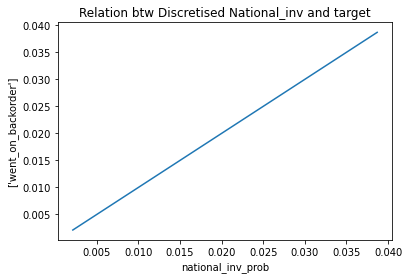

In [ ]:
fig = plt.figure()
fig = X_train_median.groupby(['national_inv_prob'])['went_on_backorder'].mean().plot()
fig.set_title("Relation btw Discretised National_inv and target")
fig.set_ylabel(['went_on_backorder'])

##### We can see a monotonic relationship between target variable and national inv and forecast_9_months features. The plot suggests that National_inv seems to be a good predictor of target variable

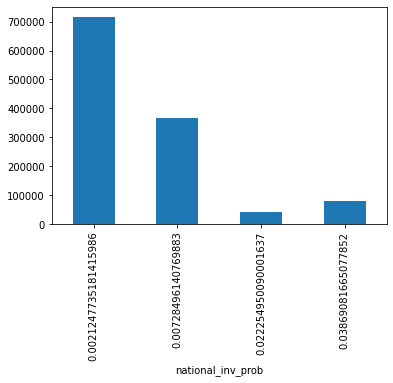

In [ ]:
#check the number of products per probabilistic bin to understand distribution of discretised variable
X_train_median.groupby(['national_inv_prob'])['went_on_backorder'].count().plot.bar()

In [ ]:
print("Unique values of National_inv prob : ",X_train_median.national_inv_prob.unique())

Unique values of National_inv prob :  [0.00212477 0.03869082 0.00728496 0.02225495]


In [ ]:
pd.concat([X_train_median.groupby(['national_inv_prob'])['national_inv'].min(),
           X_train_median.groupby(['national_inv_prob'])['national_inv'].max()],axis=1)

,national_inv,national_inv
national_inv_prob,,
0.002125,10.0,5487.0
0.007285,2.0,9.0
0.022255,1.0,1.0
0.038691,0.0,0.0


In [ ]:
X_cv_median['national_inv_prob'] = clf_inv.predict_proba(X_cv_median.national_inv.to_frame())[:,1]
X_test_median['national_inv_prob'] = clf_inv.predict_proba(X_test_median.national_inv.to_frame())[:,1]

In [ ]:
#https://medium.com/hacktive-devs/feature-engineering-in-machine-learning-part-1-a3904769cd93
#With the min max values of national_inv for each probability value, the bins are created
X_train_median['national_inv_bins'] = 0
X_train_median.loc[(X_train_median['national_inv'] == 0.0),'national_inv_bins'] = 1
X_train_median.loc[(X_train_median['national_inv'] == 1.0),'national_inv_bins'] = 2
X_train_median.loc[(X_train_median['national_inv'] >= 2.0) & (X_train_median['national_inv'] <= 9.0),'national_inv_bins'] = 3
X_train_median.loc[(X_train_median['national_inv'] >= 10.0),'national_inv_bins'] = 4

X_cv_median['national_inv_bins'] = 0
X_cv_median.loc[(X_cv_median['national_inv'] == 0.0),'national_inv_bins'] = 1
X_cv_median.loc[(X_cv_median['national_inv'] == 1.0),'national_inv_bins'] = 2
X_cv_median.loc[(X_cv_median['national_inv'] >= 2.0) & (X_cv_median['national_inv'] <= 9.0),'national_inv_bins'] = 3
X_cv_median.loc[(X_cv_median['national_inv'] >= 10.0),'national_inv_bins'] = 4

X_test_median['national_inv_bins'] = 0
X_test_median.loc[(X_test_median['national_inv'] == 0.0),'national_inv_bins'] = 1
X_test_median.loc[(X_test_median['national_inv'] == 1.0),'national_inv_bins'] = 2
X_test_median.loc[(X_test_median['national_inv'] >= 2.0) & (X_test_median['national_inv'] <= 9.0),'national_inv_bins'] = 3
X_test_median.loc[(X_test_median['national_inv'] >= 10.0),'national_inv_bins'] = 4

In [ ]:
X_train_median = X_train_median.drop(['went_on_backorder'],axis=1)

### Adding the Feature Engineered Data to the Main DataFrame


In [ ]:
for i in range(2):
    X_train_median['T_SVD_'+str(i)] = X_train_median_SVD[:,i]
    X_cv_median['T_SVD_'+str(i)] = X_cv_median_SVD[:,i]
    X_test_median['T_SVD_'+str(i)] = X_test_median_SVD[:,i]
print(X_train_median.shape,X_cv_median.shape,X_test_median.shape)

(1204076, 23) (301020, 23) (376275, 23)


In [ ]:
for i in range(2):
    X_train_median['AutoEncoder_'+str(i)] = encoded_output_Train[:,i]
    X_cv_median['AutoEncoder_'+str(i)] = encoded_output_cv[:,i]
    X_test_median['AutoEncoder_'+str(i)] = encoded_output_test[:,i]
print(X_train_median.shape,X_cv_median.shape,X_test_median.shape)

(1204076, 25) (301020, 25) (376275, 25)


In [ ]:
X_train_median.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,national_inv_prob,national_inv_bins,T_SVD_0,T_SVD_1,AutoEncoder_0,AutoEncoder_1
1450570,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.83,0.69,0,0,0,1,0,0.002125,4,6.587563,24.002680,-0.285793,3.738987
1664493,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.01,0.60,0,0,0,1,0,0.038691,1,0.020896,0.043421,-0.416248,1.490253
1814917,2.0,9.0,0.0,4.0,4.0,8.0,0.0,2.0,2.0,4.0,0.0,0,0.99,0.99,0,0,0,1,0,0.007285,3,10.156187,-1.053979,-0.422974,2.621625
973689,3.0,2.0,0.0,6.0,11.0,16.0,2.0,3.0,9.0,19.0,1.0,0,0.99,0.99,0,0,0,1,0,0.007285,3,28.903345,-4.851082,0.298605,0.813988
1809400,174.0,8.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,10.0,1.0,0,0.84,0.83,0,0,0,1,0,0.002125,4,54.357396,165.509173,1.940852,6.264754


In [ ]:
X_cv_median.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,national_inv_prob,national_inv_bins,T_SVD_0,T_SVD_1,AutoEncoder_0,AutoEncoder_1
1543612,25.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0,0.82,0.83,0,0,0,1,0,0.002125,4,7.820235,23.854342,-0.695599,5.434955
1022584,500.0,2.0,0.0,0.0,0.0,0.0,20.0,105.0,244.0,365.0,48.0,0,1.00,1.00,0,0,0,1,0,0.002125,4,458.151643,421.691458,3.557740,10.209489
282593,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0,0.98,0.96,0,0,0,1,0,0.007285,3,3.444010,4.474665,-0.606051,3.567247
344731,20.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.99,0.99,0,0,0,1,0,0.002125,4,5.286649,19.236781,-0.644908,4.695803
1693175,28.0,8.0,12.0,10.0,25.0,35.0,0.0,9.0,33.0,44.0,18.0,0,0.82,0.81,0,0,0,1,0,0.002125,4,76.783012,8.683180,0.149665,3.666030


In [ ]:
X_test_median.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,perf_6_month_avg,perf_12_month_avg,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,national_inv_prob,national_inv_bins,T_SVD_0,T_SVD_1,AutoEncoder_0,AutoEncoder_1
1635792,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.73,0.79,0,0,0,1,0,0.007285,3,0.800764,2.901162,-0.475549,2.747128
372318,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0.84,0.83,1,0,0,1,0,0.007285,3,1.449253,4.832142,-0.671774,3.839473
779373,0.0,4.0,0.0,7.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0,0.73,0.78,1,0,0,1,0,0.038691,1,8.063210,-3.167712,-0.222801,2.024238
1343798,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.57,0.68,0,0,0,1,0,0.007285,3,0.821080,2.944023,-0.704128,3.694743
969740,0.0,8.0,0.0,5.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0,0.42,0.36,1,0,0,1,0,0.038691,1,6.017107,-2.329788,-0.282863,1.828220


### Over Sampling Technique : SMOTE-NC


In [ ]:
smotenc = SMOTENC(categorical_features=[11,14,15,16,17,18,19,20],sampling_strategy=0.2)
X_train_median_os,y_train_os = smotenc.fit_sample(X_train_median,y_train)

In [ ]:
X_columns = X_train_median.columns
X_train_median_os = pd.DataFrame(X_train_median_os,columns=X_columns)
y_train_os = pd.DataFrame(y_train_os)

In [ ]:
print("Shape: ",X_train_median_os.shape,y_train_os.shape)

Shape:  (1435064, 25) (1435064, 1)


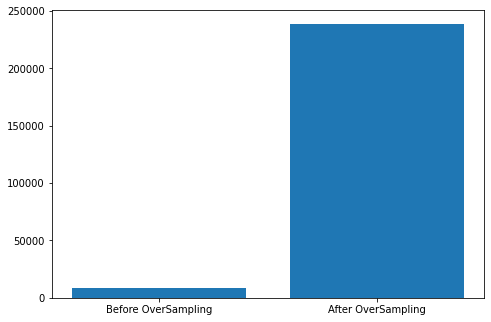

In [ ]:
minorityCount_after_os = y_train_os.value_counts()[1]
minorityCount_before_os = y_train.value_counts()[1]

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
label_for_target = ['Before OverSampling', 'After OverSampling']
counts = [minorityCount_before_os,minorityCount_after_os.values[0]]
axes.bar(label_for_target,counts)
plt.show()

## Normalise All Columns after SMOTE


In [ ]:
# Normalise Median Imputed SMOTE Data
MinMaxSc = MinMaxScaler()

X_columns = X_train_median.columns
X_train_norm = pd.DataFrame(MinMaxSc.fit_transform(X_train_median_os),columns=X_columns)
X_cv_norm = pd.DataFrame(MinMaxSc.transform(X_cv_median),columns=X_columns)
X_test_norm = pd.DataFrame(MinMaxSc.transform(X_test_median),columns=X_columns)

print(X_train_norm.shape,X_cv_norm.shape,X_test_norm.shape)

(1435064, 25) (301020, 25) (376275, 25)


## Under Sampling


In [ ]:
rus = RandomUnderSampler(sampling_strategy=0.015)
X_train_rus,y_train_rus = rus.fit_sample(X_train_median,y_train)

In [ ]:
MinMaxSc = MinMaxScaler()
X_columns = X_train_median.columns
X_train_rus = pd.DataFrame(MinMaxSc.fit_transform(X_train_rus),columns=X_columns)
y_train_rus = pd.DataFrame(y_train_rus)

In [ ]:
print(X_train_rus.shape,y_train_rus.shape)

(554122, 25) (554122, 1)


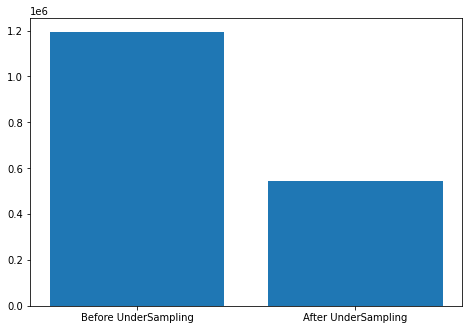

In [ ]:
majorityCount_after_us = y_train_rus.value_counts()[0]
majorityCount_before_us = y_train.value_counts()

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
label_for_target = ['Before UnderSampling', 'After UnderSampling']
counts = [majorityCount_before_us.values[0],majorityCount_after_us.values[0]]
axes.bar(label_for_target,counts)
plt.show()

In [ ]:
X_train_norm.to_csv("/content/drive/MyDrive/X_train_os.csv")
y_train_os.to_csv("/content/drive/MyDrive/y_train_os.csv")

X_cv_norm.to_csv("/content/drive/MyDrive/X_cv.csv")
y_cv.to_csv("/content/drive/MyDrive/y_cv.csv")

X_test_norm.to_csv("/content/drive/MyDrive/X_test.csv")
y_test.to_csv("/content/drive/MyDrive/y_test.csv")

X_train_rus.to_csv("/content/drive/MyDrive/X_train_rus.csv")
y_train_rus.to_csv("/content/drive/MyDrive/y_train_rus.csv")

In [ ]:
X_train_os = pd.read_csv("/content/drive/MyDrive/final/X_train_os.csv")
y_train_os = pd.read_csv("/content/drive/MyDrive/final/y_train_os.csv")

X_cv = pd.read_csv("/content/drive/MyDrive/final/X_cv.csv")
y_cv = pd.read_csv("/content/drive/MyDrive/final/y_cv.csv")

X_test = pd.read_csv("/content/drive/MyDrive/final/X_test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/final/y_test.csv")
                     
X_train_rus = pd.read_csv("/content/drive/MyDrive/final/X_train_rus.csv")
y_train_rus = pd.read_csv("/content/drive/MyDrive/final/y_train_rus.csv")

In [ ]:
# dropping the Unnamed: 0 column
X_train_os = X_train_os.drop(['Unnamed: 0'],axis=1)
y_train_os = y_train_os.drop(['Unnamed: 0'],axis=1)

X_cv = X_cv.drop(['Unnamed: 0'],axis=1)
y_cv = y_cv.drop(['Unnamed: 0'],axis=1)

X_test = X_test.drop(['Unnamed: 0'],axis=1)
y_test = y_test.drop(['Unnamed: 0'],axis=1)

X_train_rus = X_train_rus.drop(['Unnamed: 0'],axis=1)
y_train_rus = y_train_rus.drop(['Unnamed: 0'],axis=1)

 ## Key points and takeways from EDA and Feature Engineering
-  We are solving binary classification problem with very high data imbalance.Positive class being the majority.
- Categorical features consists of Yes and No Category.
- SKU is unique and is not important for classification and hence will be dropped. 
- All numerical features had extreme skewness on Right indicating them as Outliers.
- in Lead_time feature there are many Nan values. performed imputations on that feature.
- Performance average features had -99 as their value.implemented Median imputation.
- From the Correlation Matrix The Forecast,performance average and sales features are extremely correlated to each other.
- Performed Chi Square test on 2 categorical features. Made Null hypothesis for this correlation and performed statistical tests.Results state that there is no correlation between rev_stop feature and the target variable.
- Performed Point Biserial correlation test to check for correlation between categorical and numerical features.Forcast features , sales 1 month and national_inv feature are not correlated to the target variable.
- local_bo_qty and piecies_past_due  Features have close to 98% of 0s in them. They have been removed.
- Removed close to 48k outlier datapoints as a part of data cleaning process.
- Performed SMOTE-NC as we have categorical data as well , an oversampling technique to increase minority class duplicate datapoints to increase percentage of minority class.
- Used RandomUnderSampler as an undersampling technique to reduce the datapoints from majority class.
- Apart from given features, also added 2-2 Truncated SVD features, AutoEncoder Features,Discretised bin features as a feature extraction method.
   

## Random Model

Train F1 Score : 0.4376066995009326
CV F1 Score : 0.3388488256385372
Test F1 Score :  0.33859058162758676


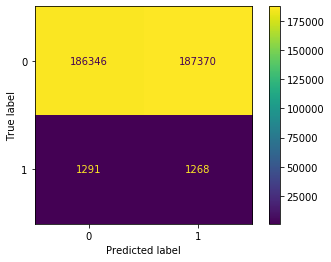

In [ ]:
def random_model(train_shape,cv_shape,test_shape):
  train = np.random.randint(2,size = train_shape)
  cv = np.random.randint(2,size = cv_shape)
  test = np.random.randint(2,size=test_shape)
  return train,cv,test

y_train_predict,y_cv_predict,y_test_predict = random_model(X_train_os.shape[0],X_cv.shape[0],X_test.shape[0])
print("Train F1 Score :",f1_score(y_train_os,y_train_predict,average = "macro"))
print("CV F1 Score :",f1_score(y_cv,y_cv_predict,average = "macro"))
print("Test F1 Score : ",f1_score(y_test,y_test_predict,average = "macro"))

confusionMatrix = confusion_matrix(y_test,y_test_predict,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

## Machine Learning Models


## Logistic Regression

#### On Oversampling

In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
train_f1_score = []
cv_f1_score=[]
test_f1_score=[]

for i in alpha:
    log_os=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    log_os.fit(X_train_os,y_train_os)
    train_y_pred_log_os = log_os.predict(X_train_os)
    cv_y_pred_log_os = log_os.predict(X_cv)
    test_y_pred_log_os = log_os.predict(X_test)
    train_f1_score.append(f1_score(y_train_os,train_y_pred_log_os,average="macro"))
    cv_f1_score.append(f1_score(y_cv,cv_y_pred_log_os,average="macro"))
    test_f1_score.append(f1_score(y_test,test_y_pred_log_os,average="macro"))

In [ ]:
for i in range(len(train_f1_score)):
    print("train f1 score for c = ",alpha[i],"is",train_f1_score[i])
for i in range(len(cv_f1_score)):
    print("cv f1 score for c = ",alpha[i],"is",cv_f1_score[i])
for i in range(len(test_f1_score)):
    print("test f1 score for c = ",alpha[i],"is",test_f1_score[i])

train f1 score for c =  1e-05 is 0.6910525930024848
train f1 score for c =  0.0001 is 0.697738054125796
train f1 score for c =  0.001 is 0.6847240966616528
train f1 score for c =  0.01 is 0.7173798146523567
train f1 score for c =  0.1 is 0.7580019335881911
train f1 score for c =  1 is 0.7918018238208452
train f1 score for c =  10 is 0.7932802662106635
train f1 score for c =  100 is 0.791761998065835
train f1 score for c =  1000 is 0.7928077174454818
cv f1 score for c =  1e-05 is 0.4952469725173912
cv f1 score for c =  0.0001 is 0.4897911516639264
cv f1 score for c =  0.001 is 0.4666923046720477
cv f1 score for c =  0.01 is 0.47210089600266536
cv f1 score for c =  0.1 is 0.4877577020373054
cv f1 score for c =  1 is 0.5006270931315808
cv f1 score for c =  10 is 0.500909647884747
cv f1 score for c =  100 is 0.4999313643258251
cv f1 score for c =  1000 is 0.500418240106782
test f1 score for c =  1e-05 is 0.4957809940833782
test f1 score for c =  0.0001 is 0.4902691413058079
test f1 score f

In [ ]:
best_alpha = np.argmax(cv_f1_score)
print("Best alpha = ",best_alpha)

Best alpha =  6


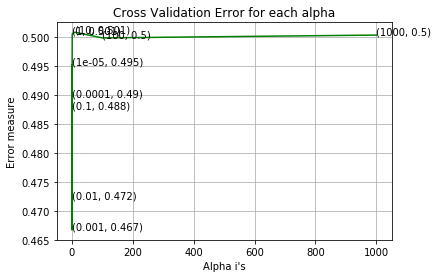

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_f1_score,c='g')
for i, txt in enumerate(np.round(cv_f1_score,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_f1_score[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
log_os_best_estimator=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
log_os_best_estimator.fit(X_train_os,y_train_os)
y_train_predict_best_log_os = log_os_best_estimator.predict(X_train_os)
y_cv_predict_best_log_os = log_os_best_estimator.predict(X_cv)
y_test_predict_best_log_os = log_os_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_os,y_train_predict_best_log_os,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_predict_best_log_os,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_predict_best_log_os,average="macro"))

Train f1 score :  0.7932802662106635
CV F1 score :  0.500909647884747
Test F1 score :  0.5002816247417555


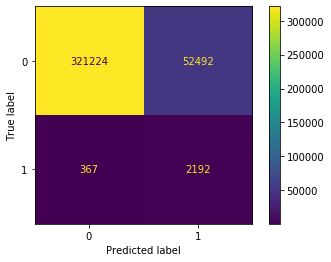

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_predict_best_log_os,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

#### On UnderSampling

In [ ]:
alpha = [10 ** x for x in range(-5, 4)]
train_f1_score = []
cv_f1_score=[]
test_f1_score=[]

for i in alpha:
    log_us=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    log_us.fit(X_train_rus,y_train_rus.values.ravel())
    train_y_pred_log_us = log_us.predict(X_train_rus)
    cv_y_pred_log_us = log_us.predict(X_cv)
    test_y_pred_log_us = log_us.predict(X_test)
    train_f1_score.append(f1_score(y_train_rus,train_y_pred_log_us,average="macro"))
    cv_f1_score.append(f1_score(y_cv,cv_y_pred_log_us,average="macro"))
    test_f1_score.append(f1_score(y_test,test_y_pred_log_us,average="macro"))

In [ ]:
for i in range(len(train_f1_score)):
    print("train f1 score for c = ",alpha[i],"is",train_f1_score[i])
for i in range(len(cv_f1_score)):
    print("cv f1 score for c = ",alpha[i],"is",cv_f1_score[i])
for i in range(len(test_f1_score)):
    print("test f1 score for c = ",alpha[i],"is",test_f1_score[i])

train f1 score for c =  1e-05 is 0.528253622477127
train f1 score for c =  0.0001 is 0.5215078567169946
train f1 score for c =  0.001 is 0.5016953800297711
train f1 score for c =  0.01 is 0.4928386414027067
train f1 score for c =  0.1 is 0.5085558150056821
train f1 score for c =  1 is 0.5278533871812511
train f1 score for c =  10 is 0.533770295915505
train f1 score for c =  100 is 0.5359718203461893
train f1 score for c =  1000 is 0.5366677238221418
cv f1 score for c =  1e-05 is 0.4987752378573946
cv f1 score for c =  0.0001 is 0.4936264481246804
cv f1 score for c =  0.001 is 0.4770273729958039
cv f1 score for c =  0.01 is 0.4587042047851878
cv f1 score for c =  0.1 is 0.4615804708886174
cv f1 score for c =  1 is 0.44540012404859375
cv f1 score for c =  10 is 0.42596469453660984
cv f1 score for c =  100 is 0.4328268762926008
cv f1 score for c =  1000 is 0.4319775737354025
test f1 score for c =  1e-05 is 0.49935319269736334
test f1 score for c =  0.0001 is 0.4939966271400905
test f1 sco

In [ ]:
best_alpha = np.argmax(cv_f1_score)
print("Best alpha = ",best_alpha)

Best alpha =  0


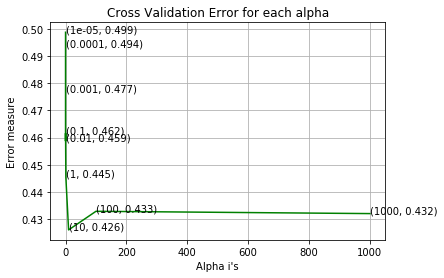

In [ ]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_f1_score,c='g')
for i, txt in enumerate(np.round(cv_f1_score,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_f1_score[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [ ]:
log_us_best_estimator=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
log_us_best_estimator.fit(X_train_rus,y_train_rus.values.ravel())
y_train_predict_best_log_us = log_us_best_estimator.predict(X_train_rus)
y_cv_predict_best_log_us = log_us_best_estimator.predict(X_cv)
y_test_predict_best_log_us = log_us_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_rus,y_train_predict_best_log_us,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_predict_best_log_us,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_predict_best_log_us,average="macro"))

Train f1 score :  0.528253622477127
CV F1 score :  0.4987752378573946
Test F1 score :  0.49935319269736334


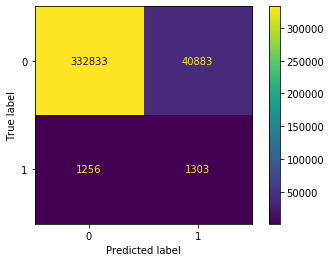

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_predict_best_log_us,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

On performing Logistic Regression on both oversampled as well as undersampled data , oversampled data provided slightly better results than that of undersampled data.The train score of oversampled data is much better than that of undersampling data. The test and cv score are slightly better for Oversampled data.

## Random Forest

#### On Oversample Data

In [ ]:
rf_os = RandomForestClassifier(n_jobs=-1,verbose=2)

params={
    'n_estimators':[300,500,750,1000,1500],
    'max_depth': [10,20,50],
    'min_samples_split':[2,5,10]
}
random_rf_os = RandomizedSearchCV(rf_os,param_distributions=params,n_iter=6,n_jobs=-1,cv=3,scoring='f1',verbose=3,return_train_score=True)
random_rf_os.fit(X_train_os,y_train_os.values.ravel())

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 3 of 500building tree 4 of 500building tree 1 of 500building tree 5 of 500building tree 6 of 500

building tree 7 of 500building tree 2 of 500


building tree 8 of 500


building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min


building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.5min


building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500


[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.6min


building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 17.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, verbose=2),
                   n_iter=6, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 50],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 500, 750, 1000,
                                                         1500]},
                   return_train_score=True, scoring='f1', verbose=3)

{'n_estimators': 1000, 'min_samples_split': 10, 'max_depth': 10} : 0.8097955590915595
{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 10} : 0.8101944375935237
{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 50} : 0.9754038899321719
{'n_estimators': 300, 'min_samples_split': 5, 'max_depth': 20} : 0.9601905071452349
{'n_estimators': 750, 'min_samples_split': 2, 'max_depth': 20} : 0.9610577777825936
{'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 10} : 0.8098669742462435


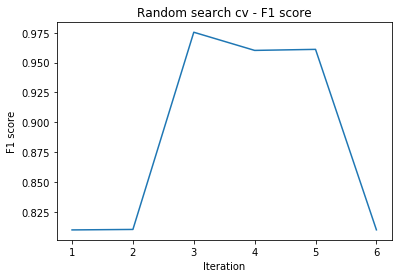

In [ ]:
labels = random_rf_os.cv_results_['params']
x_axis = range(1,7)
y_axis = random_rf_os.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_rf_os.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, verbose=2)

In [ ]:
random_rf_os_best_estimator = RandomForestClassifier(max_depth=50, min_samples_split=5, n_estimators=500,n_jobs=-1, verbose=2)
random_rf_os_best_estimator.fit(X_train_os,y_train_os.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.3min


building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  8.9min


building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 20.1min


building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 27.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=2,
                       warm_start=False)

In [ ]:
y_train_pred = random_rf_os_best_estimator.predict(X_train_os)
y_cv_pred = random_rf_os_best_estimator.predict(X_cv)
y_test_pred = random_rf_os_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_os,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    9.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:   38.7s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  1.5min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  2.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    1.9s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    7.7s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   17.7s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   24.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    2.4s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    9.7s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:   22.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:   30.8s finished


Train f1 score :  0.9966458780523608
CV F1 score :  0.6998021016369206
Test F1 score :  0.6928118131135667


In [ ]:
with open('rf_best.pkl','wb') as file:
  pickle.dump(random_rf_os_best_estimator,file)

In [ ]:
!cp '/content/rf_best.pkl' -r '/content/drive/MyDrive/rf_best.pkl'

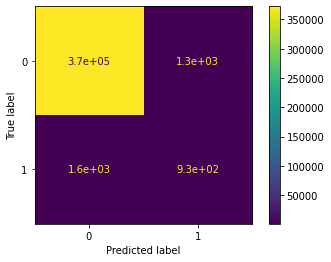

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

#### On Undersampling data

In [ ]:
rf_us = RandomForestClassifier(n_jobs=-1,verbose=2)

params={
    'n_estimators':[100,300,500,1000,1500],
    'max_depth': [10,20,50],
    'min_samples_split':[2,5,10]
}
random_rf_us = RandomizedSearchCV(rf_us,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,scoring='f1',verbose=3,return_train_score=True)
random_rf_us.fit(X_train_rus,y_train_rus.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 2 of 100building tree 3 of 100building tree 4 of 100building tree 5 of 100
building tree 1 of 100


building tree 6 of 100

building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100building tree 11 of 100

building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.7s


building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, verbose=2),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 50],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 1000,
                                                         1500]},
                   return_train_score=True, scoring='f1', verbose=3)

{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 20} : 0.2952279701639643
{'n_estimators': 1000, 'min_samples_split': 5, 'max_depth': 50} : 0.3244735663270148
{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 20} : 0.33365630604733365
{'n_estimators': 1500, 'min_samples_split': 5, 'max_depth': 50} : 0.3249906247740881
{'n_estimators': 500, 'min_samples_split': 5, 'max_depth': 20} : 0.2966671929414157


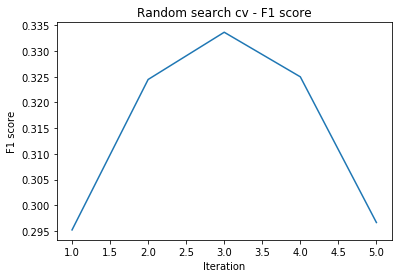

In [ ]:
labels = random_rf_us.cv_results_['params']
x_axis = range(1,6)
y_axis = random_rf_us.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_rf_us.best_estimator_

RandomForestClassifier(max_depth=20, n_jobs=-1, verbose=2)

In [ ]:
random_rf_us_best_estimator = RandomForestClassifier(max_depth=20, min_samples_split=2, n_estimators=100,n_jobs=-1,verbose=2)
random_rf_us_best_estimator.fit(X_train_rus,y_train_rus.values.ravel())

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100

building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100building tree 15 of 100

building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.3s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(max_depth=20, n_jobs=-1, verbose=2)

In [ ]:
y_train_pred = random_rf_us_best_estimator.predict(X_train_rus)
y_cv_pred = random_rf_us_best_estimator.predict(X_cv)
y_test_pred = random_rf_us_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_rus,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.0s finished


Train f1 score :  0.9163779013438992
CV F1 score :  0.583750550615439
Test F1 score :  0.5744219762206624


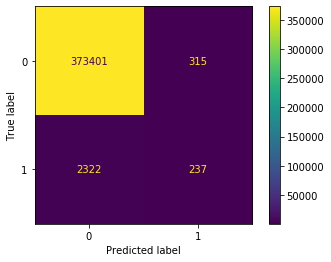

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

Random Forest with oversampled data has given F1 score of 0.7 on test and cv , which is much better than that of undersampled data.

## XGBOOST

#### On Undersample data

In [ ]:
xg_clf_us = XGBClassifier(n_jobs=-1,verbosity=3)
params={
    'learning_rate':[0.01,0.1,0.2],
     'n_estimators':[100,300,500,1000],
     'max_depth':[3,5,10]}
random_xg_us = RandomizedSearchCV(xg_clf_us,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=3,scoring='f1',return_train_score=True)
random_xg_us.fit(X_train_rus,y_train_rus.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[21:59:28] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/gbm/gbtree.cc:154: Using tree method: 2
[21:59:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 812 extra nodes, 0 pruned nodes, max_depth=10
[21:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 700 extra nodes, 0 pruned nodes, max_depth=10
[21:59:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 748 extra nodes, 0 pruned nodes, m

[22:00:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 202 extra nodes, 0 pruned nodes, max_depth=10
[22:00:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=10
[22:00:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=10
[22:00:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=10
[22:00:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=10
[22:00:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 418 extra

[22:01:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 664 extra nodes, 0 pruned nodes, max_depth=10
[22:01:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 704 extra nodes, 0 pruned nodes, max_depth=10
[22:01:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=10
[22:01:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 406 extra nodes, 0 pruned nodes, max_depth=10
[22:01:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 440 extra nodes, 0 pruned nodes, max_depth=10
[22:01:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra

[22:02:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 138 extra nodes, 0 pruned nodes, max_depth=10
[22:02:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=10
[22:02:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=10
[22:02:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 142 extra nodes, 0 pruned nodes, max_depth=10
[22:02:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 264 extra nodes, 0 pruned nodes, max_depth=10
[22:02:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 264 extr

[22:03:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 206 extra nodes, 0 pruned nodes, max_depth=10
[22:03:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 456 extra nodes, 0 pruned nodes, max_depth=10
[22:03:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=10
[22:03:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 272 extra nodes, 0 pruned nodes, max_depth=10
[22:03:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 520 extra nodes, 0 pruned nodes, max_depth=10
[22:03:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 220 extr

[22:04:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=10
[22:04:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=10
[22:04:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=10
[22:04:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 252 extra nodes, 0 pruned nodes, max_depth=10
[22:04:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 312 extra nodes, 0 pruned nodes, max_depth=10
[22:04:31] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 146 extra

[22:05:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 110 extra nodes, 0 pruned nodes, max_depth=10
[22:05:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:05:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=10
[22:05:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=10
[22:05:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 304 extra nodes, 0 pruned nodes, max_depth=10
[22:05:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 198 extra

[22:06:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 716 extra nodes, 0 pruned nodes, max_depth=10
[22:06:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=10
[22:06:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 358 extra nodes, 0 pruned nodes, max_depth=10
[22:06:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=10
[22:06:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=10
[22:06:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 162 extr

[22:07:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 114 extra nodes, 0 pruned nodes, max_depth=10
[22:07:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:07:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=10
[22:07:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=10
[22:07:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=10
[22:07:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 416 extra

[22:08:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=10
[22:08:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:08:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=10
[22:08:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 354 extra nodes, 0 pruned nodes, max_depth=10
[22:08:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 276 extra nodes, 0 pruned nodes, max_depth=10
[22:08:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 130 extra n

[22:09:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=10
[22:09:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=10
[22:09:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=10
[22:09:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 494 extra nodes, 0 pruned nodes, max_depth=10
[22:09:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=10
[22:09:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                            

{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1} : 0.2071014134552184
{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1} : 0.26196853452499175
{'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01} : 0.19345872300952335
{'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01} : 0.20759756949671568
{'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.2} : 0.38098391858209185


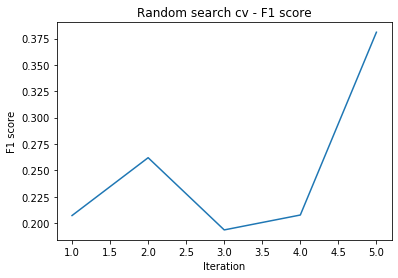

In [ ]:
labels = random_xg_us.cv_results_['params']
x_axis = range(1,6)
y_axis = random_xg_us.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_xg_us.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=3)

In [ ]:
random_xg_us_best_estimator = XGBClassifier(n_estimators=500,learning_rate=0.2,max_depth=10,n_jobs=-1,verbosity=2)
random_xg_us_best_estimator.fit(X_train_rus,y_train_rus.values.ravel())

[22:21:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 812 extra nodes, 0 pruned nodes, max_depth=10
[22:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:21:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 700 extra nodes, 0 pruned nodes, max_depth=10
[22:21:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 748 extra nodes, 0 pruned nodes, max_depth=10
[22:21:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 788 extra nodes, 0 pruned nodes, max_depth=1

[22:22:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=10
[22:22:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 132 extra nodes, 0 pruned nodes, max_depth=10
[22:22:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=10
[22:22:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 150 extra nodes, 0 pruned nodes, max_depth=10
[22:22:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 418 extra nodes, 0 pruned nodes, max_depth=10
[22:22:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 198 extra

[22:23:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 704 extra nodes, 0 pruned nodes, max_depth=10
[22:23:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=10
[22:23:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 406 extra nodes, 0 pruned nodes, max_depth=10
[22:23:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 440 extra nodes, 0 pruned nodes, max_depth=10
[22:23:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=10
[22:23:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 162 extra

[22:24:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 156 extra nodes, 0 pruned nodes, max_depth=10
[22:24:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=10
[22:24:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 142 extra nodes, 0 pruned nodes, max_depth=10
[22:24:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 264 extra nodes, 0 pruned nodes, max_depth=10
[22:24:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 264 extra nodes, 0 pruned nodes, max_depth=10
[22:24:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 278 extr

[22:25:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 456 extra nodes, 0 pruned nodes, max_depth=10
[22:25:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 102 extra nodes, 0 pruned nodes, max_depth=10
[22:25:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 272 extra nodes, 0 pruned nodes, max_depth=10
[22:25:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 520 extra nodes, 0 pruned nodes, max_depth=10
[22:25:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 220 extra nodes, 0 pruned nodes, max_depth=10
[22:25:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 310 extr

[22:26:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 94 extra nodes, 0 pruned nodes, max_depth=10
[22:26:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=10
[22:26:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 252 extra nodes, 0 pruned nodes, max_depth=10
[22:26:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 312 extra nodes, 0 pruned nodes, max_depth=10
[22:26:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 146 extra nodes, 0 pruned nodes, max_depth=10
[22:26:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 164 extra

[22:27:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:27:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=10
[22:27:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 212 extra nodes, 0 pruned nodes, max_depth=10
[22:27:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 304 extra nodes, 0 pruned nodes, max_depth=10
[22:27:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 198 extra nodes, 0 pruned nodes, max_depth=10
[22:27:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 242 extra

[22:28:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=10
[22:28:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 358 extra nodes, 0 pruned nodes, max_depth=10
[22:28:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 176 extra nodes, 0 pruned nodes, max_depth=10
[22:28:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 172 extra nodes, 0 pruned nodes, max_depth=10
[22:28:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=10
[22:28:23] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 334 extr

[22:29:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:29:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 200 extra nodes, 0 pruned nodes, max_depth=10
[22:29:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=10
[22:29:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 168 extra nodes, 0 pruned nodes, max_depth=10
[22:29:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 416 extra nodes, 0 pruned nodes, max_depth=10
[22:29:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 100 extra

[22:30:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 86 extra nodes, 0 pruned nodes, max_depth=10
[22:30:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 22 extra nodes, 0 pruned nodes, max_depth=10
[22:30:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 354 extra nodes, 0 pruned nodes, max_depth=10
[22:30:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 276 extra nodes, 0 pruned nodes, max_depth=10
[22:30:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 130 extra nodes, 0 pruned nodes, max_depth=10
[22:30:22] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra n

[22:31:14] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=10
[22:31:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 162 extra nodes, 0 pruned nodes, max_depth=10
[22:31:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 494 extra nodes, 0 pruned nodes, max_depth=10
[22:31:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=10
[22:31:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 126 extra nodes, 0 pruned nodes, max_depth=10
[22:31:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 248 extra

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [ ]:
y_train_pred = random_xg_us_best_estimator.predict(X_train_rus)
y_cv_pred = random_xg_us_best_estimator.predict(X_cv)
y_test_pred = random_xg_us_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_rus,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

Train f1 score :  0.971086052708508
CV F1 score :  0.5775755920653542
Test F1 score :  0.5766419855222337


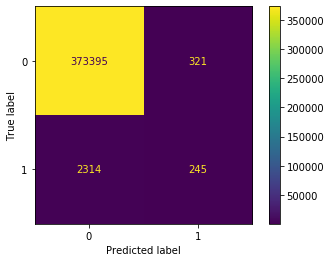

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

#### On OverSampled Data

In [ ]:
xg_clf_os = XGBClassifier(n_jobs=-1,verbosity=2)
params={
    'learning_rate':[0.01,0.1,0.2],
     'n_estimators':[75,100,300,500],
     'max_depth':[3,5,10]}
random_xg_os = RandomizedSearchCV(xg_clf_os,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=3,scoring='f1',return_train_score=True)
random_xg_os.fit(X_train_os,y_train_os.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[01:42:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:42:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:42:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:42:30] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pru

[01:43:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:43:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:43:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:43:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:43:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:43:21] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:44:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:12] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:44:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:44:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[01:45:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:45:50] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:51] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:45:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:53] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:54] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:45:55] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 p

[01:46:41] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:46:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:46:43] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:46:44] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:46:45] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:46:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:47:32] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:47:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:47:34] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:47:35] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:47:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:47:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 p

[01:48:24] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:48:25] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[01:48:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:48:27] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:48:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:48:29] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:49:15] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:49:16] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[01:49:17] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:49:18] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[01:49:19] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:49:20] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 

[01:50:06] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:50:07] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=3
[01:50:08] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:50:09] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=3
[01:50:10] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:50:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 p

[01:50:58] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:50:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:51:00] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[01:51:01] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:51:02] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[01:51:03] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 p

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                            

{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01} : 0.7615274304170246
{'n_estimators': 75, 'max_depth': 10, 'learning_rate': 0.01} : 0.8253954940487667
{'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1} : 0.9101186260337224
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1} : 0.8116534055459667
{'n_estimators': 75, 'max_depth': 5, 'learning_rate': 0.01} : 0.7347258792992593


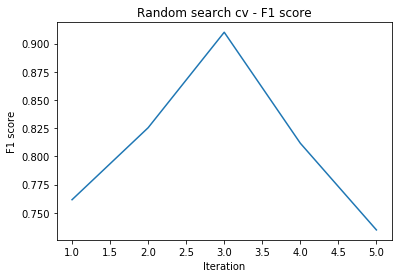

In [ ]:
labels = random_xg_os.cv_results_['params']
x_axis = range(1,6)
y_axis = random_xg_os.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_xg_os.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=2)

In [ ]:
random_xg_os_best_estimator = XGBClassifier(n_estimators=500,learning_rate=0.1,max_depth=3,n_jobs=-1,verbosity=1)
random_xg_os_best_estimator.fit(X_train_os,y_train_os.values.ravel())

[01:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=1)

In [ ]:
y_train_pred = random_xg_os_best_estimator.predict(X_train_os)
y_cv_pred = random_xg_os_best_estimator.predict(X_cv)
y_test_pred = random_xg_os_best_estimator.predict(X_test)
print("Train f1 score : ",f1_score(y_train_os,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

Train f1 score :  0.9485875519169795
CV F1 score :  0.6174882854767201
Test F1 score :  0.6157498632198313


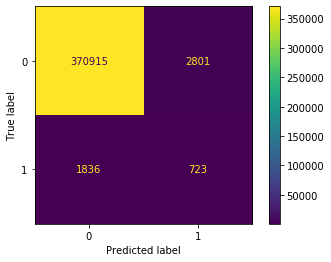

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

Xgboost with Oversampled data has performed slightly better than Undersampled data model. The performance of xgboost has been slightly lower in comparision with Random forest models.

### Adaboost Classifier

#### On Undersampled Data

In [ ]:
adaboost_clf_us = AdaBoostClassifier()
params={
    'learning_rate':[0.01,1,0.1,0.2],
     'n_estimators':[100,300,500,800,1000]
     }
random_adaboost_us = RandomizedSearchCV(adaboost_clf_us,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=3,scoring='f1',return_train_score=True)
random_adaboost_us.fit(X_train_rus,y_train_rus.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 1, 0.1, 0.2],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   return_train_score=True, scoring='f1', verbose=3)

{'n_estimators': 500, 'learning_rate': 0.1} : 0.19333020404131604
{'n_estimators': 500, 'learning_rate': 0.01} : 0.0
{'n_estimators': 1000, 'learning_rate': 0.01} : 0.004376637991627459
{'n_estimators': 300, 'learning_rate': 0.1} : 0.1537157318253563
{'n_estimators': 500, 'learning_rate': 1} : 0.1929853467272824


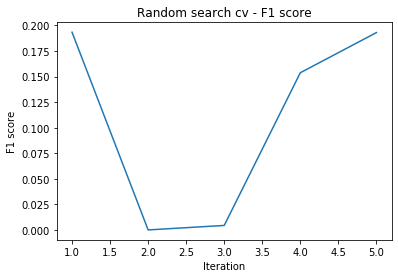

In [ ]:
labels = random_adaboost_us.cv_results_['params']
x_axis = range(1,6)
y_axis = random_adaboost_us.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_adaboost_us.best_estimator_

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

In [ ]:
adaboost_best_clf_us = AdaBoostClassifier(learning_rate=0.1,n_estimators=500)
adaboost_best_clf_us.fit(X_train_rus,y_train_rus.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=500)

In [ ]:
y_train_pred = adaboost_best_clf_us.predict(X_train_rus)
y_cv_pred = adaboost_best_clf_us.predict(X_cv)
y_test_pred = adaboost_best_clf_us.predict(X_test)
print("Train f1 score : ",f1_score(y_train_rus,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

Train f1 score :  0.5933484444484836
CV F1 score :  0.5418287877618931
Test F1 score :  0.5368928485473752


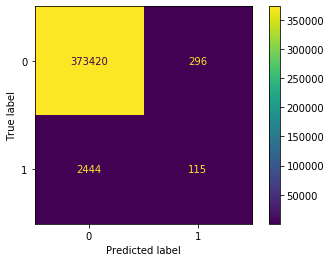

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

#### On Oversampled Data

In [ ]:
adaboost_clf_os = AdaBoostClassifier()
params={
    'learning_rate':[0.1,0.01,0.2,1],
     'n_estimators':[50,75,100,300,500]
     }
random_adaboost_os = RandomizedSearchCV(adaboost_clf_os,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=10,scoring='f1',return_train_score=True)
random_adaboost_os.fit(X_train_os,y_train_os.values.ravel())

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.01, 0.2, 1],
                                        'n_estimators': [50, 75, 100, 300,
                                                         500]},
                   return_train_score=True, scoring='f1', verbose=10)

{'n_estimators': 500, 'learning_rate': 0.1} : 0.7488840099259847
{'n_estimators': 100, 'learning_rate': 0.1} : 0.7101826925802511
{'n_estimators': 75, 'learning_rate': 0.01} : 0.6896957616148892
{'n_estimators': 100, 'learning_rate': 0.2} : 0.7261972575423772
{'n_estimators': 500, 'learning_rate': 1} : 0.8376498782478068


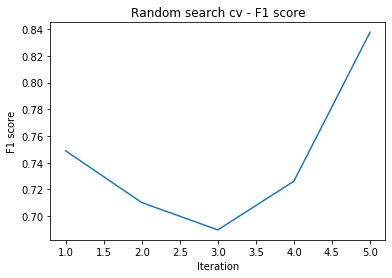

In [ ]:
labels = random_adaboost_os.cv_results_['params']
x_axis = range(1,6)
y_axis = random_adaboost_os.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("Random search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
random_adaboost_os.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [ ]:
adaboost_best_clf_os = AdaBoostClassifier(learning_rate=1,n_estimators=500)
adaboost_best_clf_os.fit(X_train_os,y_train_os.values.ravel())

AdaBoostClassifier(learning_rate=1, n_estimators=500)

In [ ]:
y_train_pred = adaboost_best_clf_os.predict(X_train_os)
y_cv_pred = adaboost_best_clf_os.predict(X_cv)
y_test_pred = adaboost_best_clf_os.predict(X_test)
print("Train f1 score : ",f1_score(y_train_os,y_train_pred,average="macro"))
print("CV F1 score : ",f1_score(y_cv,y_cv_pred,average = "macro"))
print("Test F1 score : ",f1_score(y_test,y_test_pred,average="macro"))

Train f1 score :  0.9054111651741503
CV F1 score :  0.6032530021778567
Test F1 score :  0.5994139501761452


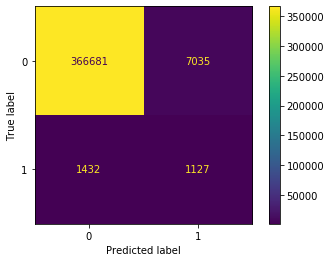

In [ ]:
confusionMatrix = confusion_matrix(y_test,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

With Adaboost models, the f1 score on test data is almost similar to that of xgboost. The oversampled data has performed slightly better than that of Undersampled data.

## Ensemble Model

#### Without Feature Engineering

In [ ]:
# Assigning the Target Variable Column to y_true variable and droping it from the DF
y_true = df['went_on_backorder']

In [ ]:
df = df.drop(['sku','went_on_backorder'],axis=1)

In [ ]:
df.shape

(1881371, 19)

In [ ]:
X_train_en,X_test_en,y_train_en,y_test_en=train_test_split(df,y_true,stratify=y_true,test_size=0.2)
print(X_train_en.shape,X_test_en.shape,y_train_en.shape,y_test_en.shape)

(1505096, 19) (376275, 19) (1505096,) (376275,)


In [ ]:
data_d1,data_d2,y_d1,y_d2 = train_test_split(X_train_en,y_train_en,stratify=y_train_en,test_size=0.5)
print(data_d1.shape,data_d2.shape,y_d1.shape,y_d2.shape)

(752548, 19) (752548, 19) (752548,) (752548,)


In [ ]:
median_values = data_d1.median()

columns = data_d1.columns

data_d1 = data_d1.fillna(median_values)
data_d2 = data_d2.fillna(median_values)
X_test_en = X_test_en.fillna(median_values)

print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 19) (752548, 19) (376275, 19)


In [ ]:
data_d1 = pd.DataFrame(data_d1,columns=columns)
data_d2 = pd.DataFrame(data_d2,columns=columns)
X_test_en = pd.DataFrame(X_test_en,columns=columns)

In [ ]:
# Normalise Median Imputed Data
MinMaxSc = MinMaxScaler()

columns = data_d1.columns
data_d1 = pd.DataFrame(MinMaxSc.fit_transform(data_d1),columns=columns)
data_d2 = pd.DataFrame(MinMaxSc.transform(data_d2),columns=columns)
X_test_en = pd.DataFrame(MinMaxSc.transform(X_test_en),columns=columns)

print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 19) (752548, 19) (376275, 19)


In [ ]:
def generating_samples_with_replacement(input_data,output_data):
    rows_selected = random.sample(range(0,len(input_data)-1),int(0.6*(len(input_data))))
    sampled_input = input_data.iloc[rows_selected]
    sampled_output = output_data.iloc[rows_selected]
    
    sampled_input = sampled_input.values.tolist()
    sampled_output = sampled_output.values.tolist()
    
    replicate = random.sample(range(0,len(sampled_input)-1),int(0.4*(len(input_data))))
    for num in replicate:
        sampled_input.append(sampled_input[num])
        sampled_output.append(sampled_output[num])
        
    return sampled_input,sampled_output

In [ ]:
def baseModel_DecisionTree(number_of_models,data_d1,y_d1,data_d2,y_d2):
    input_data_list=[]
    output_data_list=[]
    clf_list=[]
    output_list=[]
    final_data = []
    
    print("Generating samples with 60% sample and 40% sample with replacement")
    print("In Sample Generate")
    for num in range(number_of_models):
        print("Sample generation for Model : ",num)
        inp,outp = generating_samples_with_replacement(data_d1,y_d1)
        input_data_list.append(inp)
        output_data_list.append(outp)
    print("Out Sample Generate")
    
    print("Fit Decision Tree Models on samples generated")
    print("In Fitting Models")
    for num in range(number_of_models):
        print("Fitting for Model : ",num)
        DT = DecisionTreeRegressor(max_depth=None)
        clf = DT.fit(input_data_list[num],output_data_list[num])
        clf_list.append(clf)
    print("Out Fitting Models")
    
    print("Predict values for second dataset")
    print("In Predict")
    for num in range(number_of_models):
        print("Predict for Model : ",num)
        clf = clf_list[num]
        output = clf.predict(data_d2)
        output_list.append(output)
    print("Out Predict")
    
    print("Zip each row of the column to form dataset")
    print(" In form Meta Data")
    for num in range(len(output_list[0])):
        output=[]
        for i in range(number_of_models):
            output.append(output_list[i][num])
        final_data.append(output)
    print("Out form Meta Data")
    
    final_data = pd.DataFrame(final_data)
    
    return clf_list,final_data

In [ ]:
number_of_models=15
modelList,data = baseModel_DecisionTree(number_of_models,data_d1,y_d1,data_d2,y_d2)

Generating samples with 60% sample and 40% sample with replacement
In Sample Generate
Sample generation for Model :  0
Sample generation for Model :  1
Sample generation for Model :  2
Sample generation for Model :  3
Sample generation for Model :  4
Sample generation for Model :  5
Sample generation for Model :  6
Sample generation for Model :  7
Sample generation for Model :  8
Sample generation for Model :  9
Sample generation for Model :  10
Sample generation for Model :  11
Sample generation for Model :  12
Sample generation for Model :  13
Sample generation for Model :  14
Out Sample Generate
Fit Decision Tree Models on samples generated
In Fitting Models
Fitting for Model :  0
Fitting for Model :  1
Fitting for Model :  2
Fitting for Model :  3
Fitting for Model :  4
Fitting for Model :  5
Fitting for Model :  6
Fitting for Model :  7
Fitting for Model :  8
Fitting for Model :  9
Fitting for Model :  10
Fitting for Model :  11
Fitting for Model :  12
Fitting for Model :  13
Fitt

In [ ]:
# Meta Classifier - Logistic Regression

In [ ]:
lg_clf = LogisticRegression()
params = {'C':[10**x for x in range(-5,4)]}
grid_log_clf = GridSearchCV(lg_clf,param_grid=params,n_jobs=-1,scoring='f1_macro',verbose=3,return_train_score=True)
grid_log_clf.fit(data,y_d2.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   45.9s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_macro', verbose=3)

{'C': 1e-05} : 0.4982939749796286
{'C': 0.0001} : 0.4982939749796286
{'C': 0.001} : 0.5551692329818663
{'C': 0.01} : 0.6238061616131717
{'C': 0.1} : 0.6264931744337635
{'C': 1} : 0.6276808492590912
{'C': 10} : 0.6276425035563356
{'C': 100} : 0.6276425035563356
{'C': 1000} : 0.6276425035563356


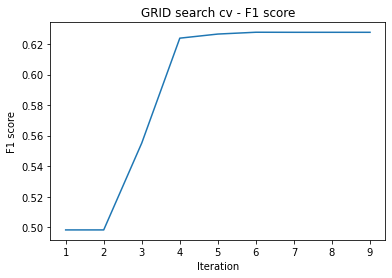

In [ ]:
labels = grid_log_clf.cv_results_['params']
x_axis = range(1,10)
y_axis = grid_log_clf.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("GRID search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
grid_log_clf.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_best = LogisticRegression(C=1)
clf_best.fit(data,y_d2.values.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
def perform_test(number_of_models,clf_list,X_test_en):
  test_output_list=[]
  test_data = []

  print("In Predicting Output for Test Data")
  for num in range(number_of_models):
    clf = clf_list[num]
    output = clf.predict(X_test_en)
    test_output_list.append(output)
  print("Out Predicting Output for Test Data")

  for i in range(len(test_output_list[0])):
    outp=[]
    for j in range(number_of_models):
      outp.append(test_output_list[j][i])
    test_data.append(outp)
  test_data = pd.DataFrame(test_data)

  return test_data

In [ ]:
test_data = perform_test(number_of_models,modelList,X_test_en)
y_test_pred = clf_best.predict(test_data)

In Predicting Output for Test Data
Out Predicting Output for Test Data


In [ ]:
print("Test F1 score : ",f1_score(y_test_en,y_test_pred,average='macro'))

Test F1 score :  0.6361531436954092


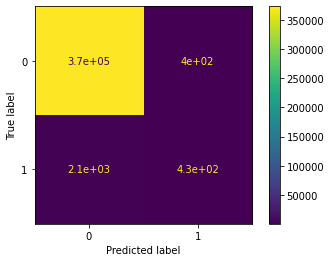

In [ ]:
confusionMatrix = confusion_matrix(y_test_en,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

#### With Feature Engineering

In [ ]:
# Assigning the Target Variable Column to y_true variable and droping it from the DF
y_true = df['went_on_backorder']

In [ ]:
df = df.drop(['sku','went_on_backorder'],axis=1)

In [ ]:
df.shape

(1881371, 19)

In [ ]:
X_train_en,X_test_en,y_train_en,y_test_en=train_test_split(df,y_true,stratify=y_true,test_size=0.2)
print(X_train_en.shape,X_test_en.shape,y_train_en.shape,y_test_en.shape)

(1505096, 19) (376275, 19) (1505096,) (376275,)


In [ ]:
data_d1,data_d2,y_d1,y_d2 = train_test_split(X_train_en,y_train_en,stratify=y_train_en,test_size=0.5)
print(data_d1.shape,data_d2.shape,y_d1.shape,y_d2.shape)

(752548, 19) (752548, 19) (752548,) (752548,)


In [ ]:
median_values = data_d1.median()

columns = data_d1.columns

data_d1 = data_d1.fillna(median_values)
data_d2 = data_d2.fillna(median_values)
X_test_en = X_test_en.fillna(median_values)

print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 19) (752548, 19) (376275, 19)


In [ ]:
data_d1 = pd.DataFrame(data_d1,columns=columns)
data_d2 = pd.DataFrame(data_d2,columns=columns)
X_test_en = pd.DataFrame(X_test_en,columns=columns)

#### SVD 

In [ ]:
Trunc_SVD = TruncatedSVD(n_components=2,n_iter=20)
data_d1_SVD = Trunc_SVD.fit_transform(data_d1) 
data_d2_SVD = Trunc_SVD.transform(data_d2)
X_test_en_SVD = Trunc_SVD.transform(X_test_en)
print(data_d1_SVD.shape,data_d2_SVD.shape,X_test_en_SVD.shape)

(752548, 2) (752548, 2) (376275, 2)


####Auto Encoders

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(0)
rn.seed(0)

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=3, verbose=1)
reduce_lr_on_val_loss = ReduceLROnPlateau(monitor='val_loss',factor=0.9,patience=1,verbose=1)

filepath="model_save_median/weights-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [ ]:
#https://machinelearningmastery.com/autoencoder-for-classification/
number_of_columns = data_d1.shape[1]
encoder_input_dim = Input(shape=(number_of_columns,))

#encoder level 1
e = Dense(number_of_columns)(encoder_input_dim)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

# encoder level 2
e = Dense(10)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

#Bottleneck
n_bottleneck = 2
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
d = Dense(10)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(number_of_columns)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output 
encoder_output = Dense(number_of_columns,activation='linear')(d)
# Defining auto encoder model
model = Model(inputs=encoder_input_dim,outputs = encoder_output)

callback_list = [earlystop,reduce_lr_on_val_loss,checkpoint]
model.compile(optimizer='adam',loss='mse')
model.fit(data_d1,y_d1,epochs=25,batch_size=100,shuffle=True,validation_data=(data_d2,y_d2),callbacks=[callback_list])


Epoch 1/25
7526/7526 [==============================] - 28s 3ms/step - loss: 0.6895 - val_loss: 0.0082

Epoch 00001: val_loss improved from inf to 0.00816, saving model to model_save_median/weights-01-0.0082.hdf5
Epoch 2/25
7526/7526 [==============================] - 27s 4ms/step - loss: 0.0079 - val_loss: 0.0068

Epoch 00002: val_loss improved from 0.00816 to 0.00681, saving model to model_save_median/weights-02-0.0068.hdf5
Epoch 3/25
7526/7526 [==============================] - 24s 3ms/step - loss: 0.0075 - val_loss: 0.0068

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 00003: val_loss improved from 0.00681 to 0.00676, saving model to model_save_median/weights-03-0.0068.hdf5
Epoch 4/25
7526/7526 [==============================] - 25s 3ms/step - loss: 0.0067 - val_loss: 0.0067

Epoch 00004: val_loss improved from 0.00676 to 0.00669, saving model to model_save_median/weights-04-0.0067.hdf5
Epoch 00004: early stopping


In [ ]:
encoder = Model(inputs =encoder_input_dim,outputs = bottleneck)
encoder.save('encoder.h5')

In [ ]:
encoded_output_data_d1 = encoder.predict(data_d1)
encoded_output_data_d2 = encoder.predict(data_d2)
encoded_output_test = encoder.predict(X_test_en)

In [ ]:
print(encoded_output_data_d1.shape,encoded_output_data_d2.shape,encoded_output_test.shape)

(752548, 2) (752548, 2) (376275, 2)


Feature Binning

In [ ]:
# Bins and Probabilities for National_inv Feature 
clf_inv = DecisionTreeClassifier(max_depth=2)
clf_inv.fit(data_d1.national_inv.to_frame(),y_d1)
data_d1['national_inv_prob'] = clf_inv.predict_proba(data_d1.national_inv.to_frame())[:,1]
print(data_d1.national_inv_prob.head(10))

844820     0.007317
197031     0.002152
897553     0.002152
1399467    0.002152
1451080    0.007317
178399     0.002152
488875     0.007317
798025     0.007317
839330     0.002152
694483     0.002152
Name: national_inv_prob, dtype: float64


In [ ]:
# Adding target variable to check relation
data_d1['went_on_backorder'] = y_d1

Text(0, 0.5, "['went_on_backorder']")

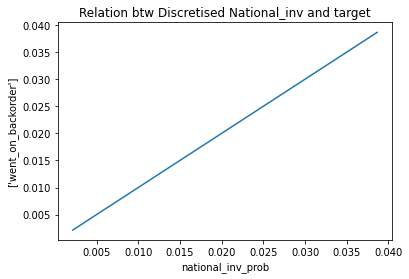

In [ ]:
fig = plt.figure()
fig = data_d1.groupby(['national_inv_prob'])['went_on_backorder'].mean().plot()
fig.set_title("Relation btw Discretised National_inv and target")
fig.set_ylabel(['went_on_backorder'])

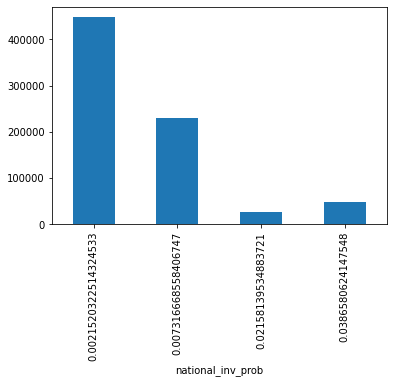

In [ ]:
#check the number of products per probabilistic bin to understand distribution of discretised variable
data_d1.groupby(['national_inv_prob'])['went_on_backorder'].count().plot.bar()

In [ ]:
print("Unique values of National_inv prob : ",data_d1.national_inv_prob.unique())

Unique values of National_inv prob :  [0.00731667 0.00215203 0.03865806 0.0215814 ]


In [ ]:
pd.concat([data_d1.groupby(['national_inv_prob'])['national_inv'].min(),
           data_d1.groupby(['national_inv_prob'])['national_inv'].max()],axis=1)

,national_inv,national_inv
national_inv_prob,,
0.002152,10.0,5486.0
0.007317,2.0,9.0
0.021581,1.0,1.0
0.038658,0.0,0.0


In [ ]:
data_d2['national_inv_prob'] = clf_inv.predict_proba(data_d2.national_inv.to_frame())[:,1]
X_test_en['national_inv_prob'] = clf_inv.predict_proba(X_test_en.national_inv.to_frame())[:,1]

In [ ]:
data_d1['national_inv_bins'] = 0
data_d1.loc[(data_d1['national_inv'] == 0.0),'national_inv_bins'] = 1
data_d1.loc[(data_d1['national_inv'] == 1.0),'national_inv_bins'] = 2
data_d1.loc[(data_d1['national_inv'] >= 2.0) & (data_d1['national_inv'] <= 9.0),'national_inv_bins'] = 3
data_d1.loc[(data_d1['national_inv'] >= 10.0),'national_inv_bins'] = 4

data_d2['national_inv_bins'] = 0
data_d2.loc[(data_d2['national_inv'] == 0.0),'national_inv_bins'] = 1
data_d2.loc[(data_d2['national_inv'] == 1.0),'national_inv_bins'] = 2
data_d2.loc[(data_d2['national_inv'] >= 2.0) & (data_d2['national_inv'] <= 9.0),'national_inv_bins'] = 3
data_d2.loc[(data_d2['national_inv'] >= 10.0),'national_inv_bins'] = 4

X_test_en['national_inv_bins'] = 0
X_test_en.loc[(X_test_en['national_inv'] == 0.0),'national_inv_bins'] = 1
X_test_en.loc[(X_test_en['national_inv'] == 1.0),'national_inv_bins'] = 2
X_test_en.loc[(X_test_en['national_inv'] >= 2.0) & (X_test_en['national_inv'] <= 9.0),'national_inv_bins'] = 3
X_test_en.loc[(X_test_en['national_inv'] >= 10.0),'national_inv_bins'] = 4

In [ ]:
data_d1 = data_d1.drop(['went_on_backorder'],axis=1)

#### Adding SVD and AutoEncoder Features in the main data

In [ ]:
for i in range(2):
    data_d1['T_SVD_'+str(i)] = data_d1_SVD[:,i]
    data_d2['T_SVD_'+str(i)] = data_d2_SVD[:,i]
    X_test_en['T_SVD_'+str(i)] = X_test_en_SVD[:,i]
print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 23) (752548, 23) (376275, 23)


In [ ]:
for i in range(2):
    data_d1['AutoEncoder_'+str(i)] = encoded_output_data_d1[:,i]
    data_d2['AutoEncoder_'+str(i)] = encoded_output_data_d2[:,i]
    X_test_en['AutoEncoder_'+str(i)] = encoded_output_test[:,i]
print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 25) (752548, 25) (376275, 25)


#### Normalise Data

In [ ]:
# Normalise Median Imputed Data
MinMaxSc = MinMaxScaler()

columns = data_d1.columns
data_d1 = pd.DataFrame(MinMaxSc.fit_transform(data_d1),columns=columns)
data_d2 = pd.DataFrame(MinMaxSc.transform(data_d2),columns=columns)
X_test_en = pd.DataFrame(MinMaxSc.transform(X_test_en),columns=columns)

print(data_d1.shape,data_d2.shape,X_test_en.shape)

(752548, 25) (752548, 25) (376275, 25)


In [ ]:
number_of_models=15
modelList,data = baseModel_DecisionTree(number_of_models,data_d1,y_d1,data_d2,y_d2)

Generating samples with 60% sample and 40% sample with replacement
In Sample Generate
Sample generation for Model :  0
Sample generation for Model :  1
Sample generation for Model :  2
Sample generation for Model :  3
Sample generation for Model :  4
Sample generation for Model :  5
Sample generation for Model :  6
Sample generation for Model :  7
Sample generation for Model :  8
Sample generation for Model :  9
Sample generation for Model :  10
Sample generation for Model :  11
Sample generation for Model :  12
Sample generation for Model :  13
Sample generation for Model :  14
Out Sample Generate
Fit Decision Tree Models on samples generated
In Fitting Models
Fitting for Model :  0
Fitting for Model :  1
Fitting for Model :  2
Fitting for Model :  3
Fitting for Model :  4
Fitting for Model :  5
Fitting for Model :  6
Fitting for Model :  7
Fitting for Model :  8
Fitting for Model :  9
Fitting for Model :  10
Fitting for Model :  11
Fitting for Model :  12
Fitting for Model :  13
Fitt

In [ ]:
# Meta Classifier - Logistic Regression

In [ ]:
lg_clf = LogisticRegression()
params = {'C':[10**x for x in range(-5,4)]}
grid_log_clf = GridSearchCV(lg_clf,param_grid=params,n_jobs=-1,scoring='f1_macro',verbose=3)
grid_log_clf.fit(data,y_d2.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   39.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=3)

{'C': 1e-05} : 0.4982939749796286
{'C': 0.0001} : 0.4982939749796286
{'C': 0.001} : 0.5534706671930081
{'C': 0.01} : 0.621628415859751
{'C': 0.1} : 0.6283068586396076
{'C': 1} : 0.6287836210301228
{'C': 10} : 0.6290223855418355
{'C': 100} : 0.6292815696831074
{'C': 1000} : 0.6292815696831074


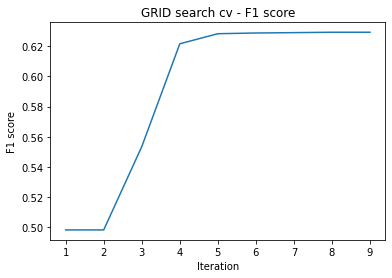

In [ ]:
labels = grid_log_clf.cv_results_['params']
x_axis = range(1,10)
y_axis = grid_log_clf.cv_results_['mean_test_score']
for i,label in enumerate(labels):
    print(label,":",y_axis[i])
    
plt.xlabel("Iteration")
plt.ylabel("F1 score")
plt.title("GRID search cv - F1 score")
plt.plot(x_axis,y_axis)

In [ ]:
grid_log_clf.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf_best = LogisticRegression(C=10)
clf_best.fit(data,y_d2.values.ravel())

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_data = perform_test(number_of_models,modelList,X_test_en)
y_test_pred = clf_best.predict(test_data)

In Predicting Output for Test Data
Out Predicting Output for Test Data


In [ ]:
print("Test F1 score : ",f1_score(y_test_en,y_test_pred,average='macro'))

Test F1 score :  0.6207567400765969


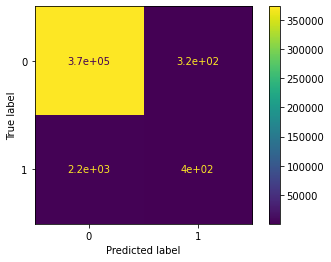

In [ ]:
confusionMatrix = confusion_matrix(y_test_en,y_test_pred,labels=[0,1])
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix,display_labels=[0,1])
cm_display.plot()

- With use of Custom Ensemble models we see that with increasing number of base models ie Decision Tree the F1 scores initially increase and then tapers off. 
- With Custom Ensembles applied on with and without feature engineering data , the f1 score almost in the same range.
- Amongst all the models applied  Random Forest with Oversampling data has given the best F1 score of 0.7 on cv and test data.

## Summary

- We observe that with every model the improvement in f1 scores.
- We saw that the Model on oversampled data perform well as compared to Undersampled data,this could be because of loss of data while undersampling.
- Among all the models , Random Forest Model provided a f1 score of 0.69 and models including XGBoost and Custom ensembles gave a f1 score of 0.62.

In [ ]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Model','Parameter','Technique','Train F1 Score','CV F1 Score','Test F1 Score']
table.add_row(['Logistic Regression','Best Alpha = '+ str(10),'SMOTE',0.79,0.50,0.50])
table.add_row(['Logistic Regression','Best Alpha = '+ str(1e-05),'RUS',0.52,0.49,0.49])
table.add_row(['Random Forest',"n_estimators = "+str(500) + " , max_depth = "+str(50) + " , min_samples_split = "+str(5),'SMOTE',0.99,0.69,0.69])
table.add_row(['Random Forest',"n_estimators = "+str(100) + " , max_depth = "+str(20) + " , min_samples_split = "+str(2),'RUS',0.91,0.58,0.57])
table.add_row(['XGBOOST',"n_estimators = "+str(500) + " , learning rate = "+str(0.1) + " , max_depth = "+str(3),'SMOTE',0.94,0.61,0.61])
table.add_row(['XGBOOST',"n_estimators = "+str(500) + " , learning rate = "+str(0.2) + " , max_depth = "+str(10),'RUS',0.97,0.57,0.57])
table.add_row(['AdaBoost',"n_estimators = "+str(500) + " , learning rate = "+str(1),'SMOTE',0.96,0.60,0.59])
table.add_row(['AdaBoost',"n_estimators = "+str(500) + " , learning rate = "+str(0.1),'RUS',0.59,0.54,0.53])
table.add_row(['Ensemble Models',"Decision Tree + Logistic Regression ",'With FE',0.62,"-",0.63])
table.add_row(['Ensemble Models',"Decision Tree + Logistic Regression ",'Without FE',0.62,"-",0.62])
print(table)

+---------------------+-------------------------------------------------------------+------------+----------------+-------------+---------------+
|        Model        |                          Parameter                          | Technique  | Train F1 Score | CV F1 Score | Test F1 Score |
+---------------------+-------------------------------------------------------------+------------+----------------+-------------+---------------+
| Logistic Regression |                       Best Alpha = 10                       |   SMOTE    |      0.79      |     0.5     |      0.5      |
| Logistic Regression |                      Best Alpha = 1e-05                     |    RUS     |      0.52      |     0.49    |      0.49     |
|    Random Forest    | n_estimators = 500 , max_depth = 50 , min_samples_split = 5 |   SMOTE    |      0.99      |     0.69    |      0.69     |
|    Random Forest    | n_estimators = 100 , max_depth = 20 , min_samples_split = 2 |    RUS     |      0.91      |     0.58